[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/rodreras/geopy_minicurso/HEAD)

# Geology Workflow with Python

You are a Geologist at OreExtraction Inc. and have received a series of drilling data for analysis.

Since the company's owner is frugal and loves open-source communities, he doesn't purchase any software licenses, meaning you need to conduct all analyses in Python.

For this, you will need to:

a) Load, verify, and clean the data with `Pandas` and `Numpy`

b) Plot the data on a map and see its location with `Geopandas`

c) The drilling profile with  `Striplog`

d) The chemical composition with `Pyrolite`

e)Stereonet of attitudes with `mplstereo`

f) Plot in 3D with `Sondaje3D`


**Important** 

Some libraries we will use are not pre-installed in Google Colab, so initially, we will download all of them with the example command: `!pip install [library]`

In [1]:
# Importing Base Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Project Libraries

  # Spatial Analysis
import geopandas as gpd
import folium
import contextily as cx

  # Geochemical Analysis
import pyrolite as py

  # Well Analysis
from striplog import Striplog, Legend, Lexicon, Interval, Component

    # Creating a different flow to import functions
    # from the sondaje3d.py file
import sys
import os
import pyrolite.plot

from sondaje3d import DrillData

print('All libraries have been loaded')

All libraries have been loaded


In [2]:
!pip install folium matplotlib mapclassify
! pip install  mplstereonet
!pip install matplotlib --upgrade
!pip install pyrolite

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# a) Importing, Verifying, and Cleaning Data

The first and most important step!

In [3]:
# Importing the 3 tables
assay = pd.read_csv('Drillholes_Assay.csv', sep = ';', decimal = ',')
collar = pd.read_csv('Drillholes_Collar.csv', sep = ';', decimal = ',')
geology = pd.read_csv('Drillholes_Geology.csv', sep = ';', decimal = ',')

print('All tables have been imported!')

All tables have been imported!


In [4]:
# Checking the data from the tables
display(assay.head())

display(assay.columns)

display(assay.info())

sample_id         hole_id  depth_from  depth_to  \
0  AMOSTRA_1001             NaN         NaN       NaN   
1  AMOSTRA_1002             NaN         NaN       NaN   
2  AMOSTRA_1003  DrillHole_0005        0.00      1.50   
3  AMOSTRA_1004  DrillHole_0005        1.50      2.75   
4  AMOSTRA_1005  DrillHole_0005        2.75      4.00   

                               litho_reclass  SiO2_pct  TiO2_pct  Al2O3_pct  \
0                                        NaN      97.4      0.03       0.09   
1                                        NaN      54.2      0.02       0.49   
2                                        NaN      56.8      0.20       6.66   
3  Rocha Calcissilicatica Nao Magnetitoetica      47.5      0.88      13.25   
4  Rocha Calcissilicatica Nao Magnetitoetica      63.1      0.36       4.99   

   Cr2O3_pct  Fe_pct  ...  Pb_pct  S_pct  Sn_pct  Sr_pct  V_pct  Zn_pct  \
0      0.004    0.62  ...     NaN  0.003  0.0001   0.001  0.001     NaN   
1        NaN   30.18  ...   0.003    NaN  0.0001     NaN  0.002   0.003   
2      0.009   20.28  ...     NaN  0.005  0.0001   0.003  0.003   0.012   
3      0.037    9.15  ...   0.004  0.010  0.0001   0.019  0.010   0.023   
4      0.020   11.32  ...   0.008  0.012  0.0010   0.010  0.006   0.021   

   Zr_pct  total_pct  FeO_pct  mag_pct  
0     NaN      98.53     0.72     1.34  
1   0.002     100.40     1.39      NaN  
2   0.007     100.10     2.36     6.15  
3   0.027     100.10     0.79     0.63  
4   0.011     100.60     2.33     1.16  

[5 rows x 33 columns]

Index(['sample_id', 'hole_id', 'depth_from', 'depth_to', 'litho_reclass',
       'SiO2_pct', 'TiO2_pct', 'Al2O3_pct', 'Cr2O3_pct', 'Fe_pct', 'Mn_pct',
       'CaO_pct', 'MgO_pct', 'Na2O_pct', 'K2O_pct', 'BaO_pct', 'P_pct',
       'loi_pct', 'As_pct', 'Cl_pct', 'Co_pct', 'Cu_pct', 'Ni_pct', 'Pb_pct',
       'S_pct', 'Sn_pct', 'Sr_pct', 'V_pct', 'Zn_pct', 'Zr_pct', 'total_pct',
       'FeO_pct', 'mag_pct'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6277 entries, 0 to 6276
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sample_id      6277 non-null   object 
 1   hole_id        6035 non-null   object 
 2   depth_from     5134 non-null   float64
 3   depth_to       5134 non-null   float64
 4   litho_reclass  1247 non-null   object 
 5   SiO2_pct       4811 non-null   float64
 6   TiO2_pct       4794 non-null   float64
 7   Al2O3_pct      4810 non-null   float64
 8   Cr2O3_pct      4641 non-null   float64
 9   Fe_pct         4811 non-null   float64
 10  Mn_pct         4808 non-null   float64
 11  CaO_pct        4778 non-null   float64
 12  MgO_pct        4807 non-null   float64
 13  Na2O_pct       4760 non-null   float64
 14  K2O_pct        4804 non-null   float64
 15  BaO_pct        4569 non-null   float64
 16  P_pct          4811 non-null   float64
 17  loi_pct        4811 non-null   float64
 18  As_pct  

None

In [5]:
# Checking the data from the collar tables
display(collar.head())

display(collar.columns)

display(collar.info())

Hole Identificador          Zone Utm          x           y  Elevation  \
0     DrillHole_0001  SIRGAS2000 - 24S  182038.41  9325551.30     243.89   
1     DrillHole_0002  SIRGAS2000 - 24S  182000.37  9325583.08     242.32   
2     DrillHole_0003  SIRGAS2000 - 24S  182001.47  9325517.67     239.31   
3     DrillHole_0004  SIRGAS2000 - 24S  181968.83  9325577.40     239.70   
4     DrillHole_0005  SIRGAS2000 - 24S  182058.91  9325589.29     248.35   

   Depth m  Dip  Azimute  
0    87.91  -60      132  
1   107.40  -60      132  
2    87.11  -60      132  
3    75.91  -60      132  
4    98.54  -60      132

Index(['Hole Identificador', 'Zone Utm', 'x', 'y', 'Elevation', 'Depth m',
       'Dip', 'Azimute'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hole Identificador  89 non-null     object 
 1   Zone Utm            89 non-null     object 
 2   x                   89 non-null     float64
 3   y                   89 non-null     float64
 4   Elevation           89 non-null     float64
 5   Depth m             89 non-null     float64
 6   Dip                 89 non-null     int64  
 7   Azimute             89 non-null     int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.7+ KB


None

In [6]:
# Checking the data from the geology tables
display(geology.head())

display(geology.columns)

display(geology.info())

Hole Identificador  from_m   to_m  length_m  \
0     DrillHole_0001    0.00   3.05      3.05   
1     DrillHole_0001    3.05   4.70      1.65   
2     DrillHole_0001    4.70   8.22      3.52   
3     DrillHole_0001    8.22  11.60      3.38   
4     DrillHole_0001   11.60  14.86      3.26   

                        Lithology 1  \
0                       Solo Marrom   
1  Rocha Calcissilicatica Magnetica   
2  Rocha Calcissilicatica Magnetica   
3  Rocha Calcissilicatica Magnetica   
4  Rocha Calcissilicatica Magnetica   

                                 Geology Description  
0  Material Cascalhoso, por vezes, apresentando f...  
1  Material de coloração laranja. Apresentando al...  
2  Rocha Calcissilicática. Apresenta carbonatação...  
3  Rocha de coloração preta contendo grande quant...  
4  Rocha Calcissilicática saprolitizada contendo ...

Index(['Hole Identificador', 'from_m', 'to_m', 'length_m', 'Lithology 1',
       'Geology Description'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hole Identificador   1466 non-null   object 
 1   from_m               1466 non-null   float64
 2   to_m                 1466 non-null   float64
 3   length_m             1466 non-null   float64
 4   Lithology 1          1466 non-null   object 
 5   Geology Description  1466 non-null   object 
dtypes: float64(3), object(3)
memory usage: 68.8+ KB


None

As we can see, each table contains distinct data:: 

- `Assay`: depth data of each drilling layer, lithology, and chemical data.

- `Collar`: coordinates and structural data

- `Geology`: rock description and lithology

Therefore, for our overall analysis, we will need information on:
  - coordinates
  - chemical data
  - structural data
  - layer thickness
  - identifier name of the drillings

This means we will have to create a new `dataframe` based on the information from `Assay` and  `Collar`. 

**Important**: note that the name of the column identifying the drillings is different. We need to change that.

In [7]:
#renamin the colum name

collar.rename(columns = {'Hole Identificador': 'hole_id'}, inplace = True)

In [8]:
collar.head()

hole_id          Zone Utm          x           y  Elevation  \
0  DrillHole_0001  SIRGAS2000 - 24S  182038.41  9325551.30     243.89   
1  DrillHole_0002  SIRGAS2000 - 24S  182000.37  9325583.08     242.32   
2  DrillHole_0003  SIRGAS2000 - 24S  182001.47  9325517.67     239.31   
3  DrillHole_0004  SIRGAS2000 - 24S  181968.83  9325577.40     239.70   
4  DrillHole_0005  SIRGAS2000 - 24S  182058.91  9325589.29     248.35   

   Depth m  Dip  Azimute  
0    87.91  -60      132  
1   107.40  -60      132  
2    87.11  -60      132  
3    75.91  -60      132  
4    98.54  -60      132

Alright, now let's merge the tables( assay and collar) into one, using the `hole_id` column.

In [9]:
# A loop to get the x,y,z,holeid,azimute from the two tables

holes = assay.copy()

coordList = []

for name, x, y, z, dip, az in zip(collar.hole_id,
                                  collar.x,
                                  collar.y,
                                  collar.Elevation,
                                  collar.Dip,
                                  collar.Azimute):
    for i, j in holes.iterrows():
        if j.hole_id == name:
            coordList.append([x, y, z, dip, az])

coordList
# checking the result
# holes.columns


[[182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41

In [10]:
len(coordList)

6035

In [11]:
# we will not merge the tables because there is a difference of 28 columns.
# if we try to merge, python will return an error
#len(assay) -len(coordlist)

6277-6305

-28

In [12]:
# creating a copy to make changes
holes_copy = holes.copy()

In [13]:
holes_copy.head()

sample_id         hole_id  depth_from  depth_to  \
0  AMOSTRA_1001             NaN         NaN       NaN   
1  AMOSTRA_1002             NaN         NaN       NaN   
2  AMOSTRA_1003  DrillHole_0005        0.00      1.50   
3  AMOSTRA_1004  DrillHole_0005        1.50      2.75   
4  AMOSTRA_1005  DrillHole_0005        2.75      4.00   

                               litho_reclass  SiO2_pct  TiO2_pct  Al2O3_pct  \
0                                        NaN      97.4      0.03       0.09   
1                                        NaN      54.2      0.02       0.49   
2                                        NaN      56.8      0.20       6.66   
3  Rocha Calcissilicatica Nao Magnetitoetica      47.5      0.88      13.25   
4  Rocha Calcissilicatica Nao Magnetitoetica      63.1      0.36       4.99   

   Cr2O3_pct  Fe_pct  ...  Pb_pct  S_pct  Sn_pct  Sr_pct  V_pct  Zn_pct  \
0      0.004    0.62  ...     NaN  0.003  0.0001   0.001  0.001     NaN   
1        NaN   30.18  ...   0.003    NaN  0.0001     NaN  0.002   0.003   
2      0.009   20.28  ...     NaN  0.005  0.0001   0.003  0.003   0.012   
3      0.037    9.15  ...   0.004  0.010  0.0001   0.019  0.010   0.023   
4      0.020   11.32  ...   0.008  0.012  0.0010   0.010  0.006   0.021   

   Zr_pct  total_pct  FeO_pct  mag_pct  
0     NaN      98.53     0.72     1.34  
1   0.002     100.40     1.39      NaN  
2   0.007     100.10     2.36     6.15  
3   0.027     100.10     0.79     0.63  
4   0.011     100.60     2.33     1.16  

[5 rows x 33 columns]

In [14]:
holes_copy.describe()

depth_from     depth_to     SiO2_pct     TiO2_pct    Al2O3_pct  \
count  5134.000000  5134.000000  4811.000000  4794.000000  4810.000000   
mean     51.580230    52.592707    49.936826     0.312420     5.408526   
std      35.814002    35.806422    17.370602     0.324016     4.232505   
min       0.000000     0.750000     5.310000     0.010000     0.010000   
25%      24.315000    25.252500    42.600000     0.150000     2.360000   
50%      45.885000    46.815000    49.600000     0.250000     3.910000   
75%      71.000000    72.000000    54.500000     0.390000     8.210000   
max     188.950000   190.000000   100.000000     4.650000    21.000000   

         Cr2O3_pct       Fe_pct       Mn_pct      CaO_pct      MgO_pct  ...  \
count  4641.000000  4811.000000  4808.000000  4778.000000  4807.000000  ...   
mean      0.012917    16.858848     0.292403     7.980452     4.530751  ...   
std       0.030131    10.872633     0.283607    10.087101     3.919900  ...   
min       0.000100     0.270000     0.001000     0.010000     0.010000  ...   
25%       0.003000     6.360000     0.101000     1.380000     1.740000  ...   
50%       0.007000    18.140000     0.213000     3.145000     3.260000  ...   
75%       0.013000    26.010000     0.392000    10.387500     6.490000  ...   
max       0.631000    41.110000     3.500000    40.000000    30.400000  ...   

            Pb_pct        S_pct       Sn_pct       Sr_pct        V_pct  \
count  4437.000000  4338.000000  4738.000000  4533.000000  4499.000000   
mean      0.002590     0.160399     0.001257     0.006783     0.003919   
std       0.004022     0.299092     0.002766     0.006779     0.004183   
min       0.000100     0.000100     0.000100     0.000100     0.000100   
25%       0.000100     0.005000     0.000100     0.003000     0.001000   
50%       0.001000     0.033000     0.000100     0.005000     0.003000   
75%       0.004000     0.177000     0.001000     0.008000     0.005000   
max       0.122000     5.000000     0.019000     0.103000     0.050000   

            Zn_pct       Zr_pct    total_pct      FeO_pct      mag_pct  
count  4605.000000  4676.000000  4754.000000  5065.000000  4702.000000  
mean      0.010151     0.009589   100.352125     9.081481     8.028756  
std       0.010659     0.007186     1.204885     7.415636     9.895884  
min       0.000100     0.000100    94.640000     0.010000     0.010000  
25%       0.004000     0.005000    99.930000     3.130000     0.720000  
50%       0.007000     0.008000   100.450000     6.820000     2.090000  
75%       0.012000     0.013000   100.950000    15.100000    14.037500  
max       0.120000     0.059000   110.000000    37.100000    53.450000  

[8 rows x 30 columns]

# b) Creating a Map

Now that we have our data organized, we will visualize it on maps with the Geopandas and Folium libraries.

To do this, we need to transform our `dataframe` into a `geodataframe`, that is, with spatial information.

In [15]:
collar_copy = collar.copy()
collar_copy.head()

hole_id          Zone Utm          x           y  Elevation  \
0  DrillHole_0001  SIRGAS2000 - 24S  182038.41  9325551.30     243.89   
1  DrillHole_0002  SIRGAS2000 - 24S  182000.37  9325583.08     242.32   
2  DrillHole_0003  SIRGAS2000 - 24S  182001.47  9325517.67     239.31   
3  DrillHole_0004  SIRGAS2000 - 24S  181968.83  9325577.40     239.70   
4  DrillHole_0005  SIRGAS2000 - 24S  182058.91  9325589.29     248.35   

   Depth m  Dip  Azimute  
0    87.91  -60      132  
1   107.40  -60      132  
2    87.11  -60      132  
3    75.91  -60      132  
4    98.54  -60      132

<Axes: >

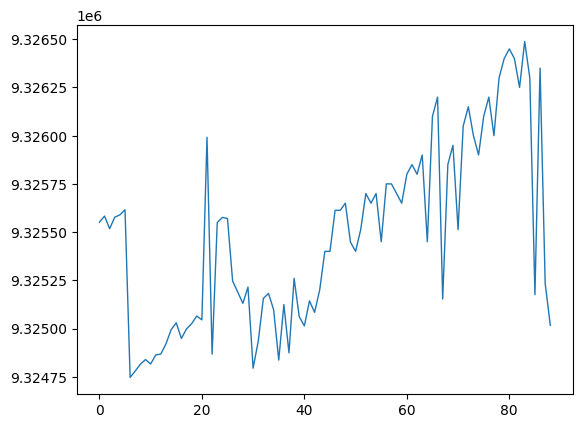

In [16]:
collar_copy[ 'y'].plot()

In [17]:
#Let's call our GeoDataFrame gdf

gdf = gpd.GeoDataFrame(collar_copy,
                       geometry = gpd.points_from_xy(
                                                      x = collar_copy['x'],
                                                      y = collar_copy['y']  
                                                     )
                      )
gdf.head()

hole_id          Zone Utm          x           y  Elevation  \
0  DrillHole_0001  SIRGAS2000 - 24S  182038.41  9325551.30     243.89   
1  DrillHole_0002  SIRGAS2000 - 24S  182000.37  9325583.08     242.32   
2  DrillHole_0003  SIRGAS2000 - 24S  182001.47  9325517.67     239.31   
3  DrillHole_0004  SIRGAS2000 - 24S  181968.83  9325577.40     239.70   
4  DrillHole_0005  SIRGAS2000 - 24S  182058.91  9325589.29     248.35   

   Depth m  Dip  Azimute                        geometry  
0    87.91  -60      132  POINT (182038.410 9325551.300)  
1   107.40  -60      132  POINT (182000.370 9325583.080)  
2    87.11  -60      132  POINT (182001.470 9325517.670)  
3    75.91  -60      132  POINT (181968.830 9325577.400)  
4    98.54  -60      132  POINT (182058.910 9325589.290)

<Axes: >

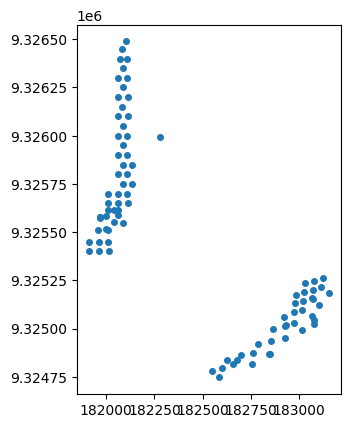

In [18]:
gdf.plot()

In [19]:
# checking the crs
print(gdf.crs)

None


In [20]:
# defining the crs
gdf.set_crs('epsg:31984', inplace=True)
gdf.crs

<Projected CRS: EPSG:31984>
Name: SIRGAS 2000 / UTM zone 24S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 42°W and 36°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-42.0, -26.35, -36.0, 0.74)
Coordinate Operation:
- name: UTM zone 24S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
gdf.explore(tiles = "Stamen Terrain",
            color = '#232922',
            )

In [22]:
gdf.head()

hole_id          Zone Utm          x           y  Elevation  \
0  DrillHole_0001  SIRGAS2000 - 24S  182038.41  9325551.30     243.89   
1  DrillHole_0002  SIRGAS2000 - 24S  182000.37  9325583.08     242.32   
2  DrillHole_0003  SIRGAS2000 - 24S  182001.47  9325517.67     239.31   
3  DrillHole_0004  SIRGAS2000 - 24S  181968.83  9325577.40     239.70   
4  DrillHole_0005  SIRGAS2000 - 24S  182058.91  9325589.29     248.35   

   Depth m  Dip  Azimute                        geometry  
0    87.91  -60      132  POINT (182038.410 9325551.300)  
1   107.40  -60      132  POINT (182000.370 9325583.080)  
2    87.11  -60      132  POINT (182001.470 9325517.670)  
3    75.91  -60      132  POINT (181968.830 9325577.400)  
4    98.54  -60      132  POINT (182058.910 9325589.290)

Text(0.5, 0.98, 'Drilling Distribution of OreExtraction')

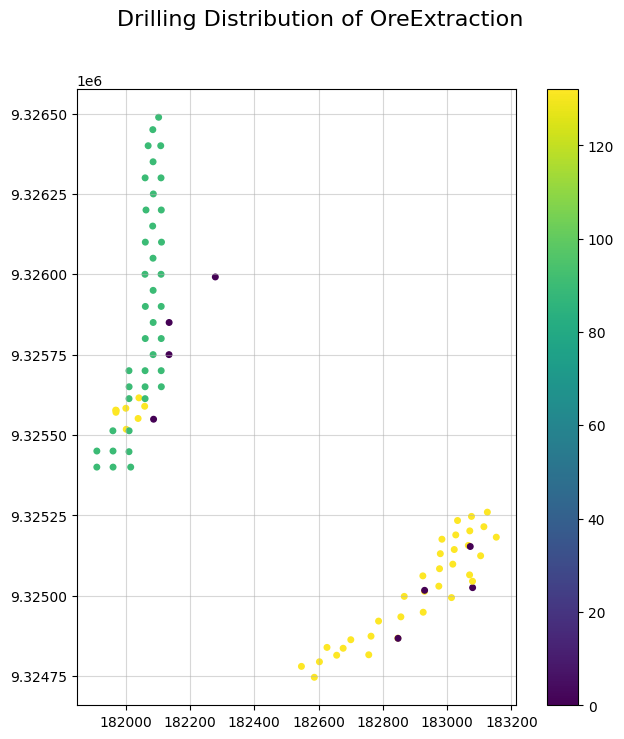

In [23]:
# creating the plot

fig, axes = plt.subplots(figsize=(8,8))

# setting to plot
gdf.plot(column='Azimute',
         ax=axes,
         legend=True)

# adding the coordinate grid
plt.grid(alpha=0.5)

# setting the title
fig.suptitle('Drilling Distribution of OreExtraction', fontsize=16)

# saving the figure
#plt.savefig(path+'drilling_map.jpeg', dpi=300);

# c)  Drilling Profiles

For this part on drilling profiles, we will use Striplog. It's a quite complex library, but we'll only touch on the more superficial part - which is precisely plotting 2D graphs of the drillings.

In [24]:
geology_copy = geology.copy()
geology_copy.head()

Hole Identificador  from_m   to_m  length_m  \
0     DrillHole_0001    0.00   3.05      3.05   
1     DrillHole_0001    3.05   4.70      1.65   
2     DrillHole_0001    4.70   8.22      3.52   
3     DrillHole_0001    8.22  11.60      3.38   
4     DrillHole_0001   11.60  14.86      3.26   

                        Lithology 1  \
0                       Solo Marrom   
1  Rocha Calcissilicatica Magnetica   
2  Rocha Calcissilicatica Magnetica   
3  Rocha Calcissilicatica Magnetica   
4  Rocha Calcissilicatica Magnetica   

                                 Geology Description  
0  Material Cascalhoso, por vezes, apresentando f...  
1  Material de coloração laranja. Apresentando al...  
2  Rocha Calcissilicática. Apresenta carbonatação...  
3  Rocha de coloração preta contendo grande quant...  
4  Rocha Calcissilicática saprolitizada contendo ...

In [25]:
geology_copy.rename(columns = {'from_m':'top',
                               'to_m':'base',
                               'Lithology 1':'lithology',
                               'Hole Identificador':'hole_id'
                               }, 
                    inplace = True)

In [26]:
geology_copy

hole_id    top   base  length_m  \
0     DrillHole_0001   0.00   3.05      3.05   
1     DrillHole_0001   3.05   4.70      1.65   
2     DrillHole_0001   4.70   8.22      3.52   
3     DrillHole_0001   8.22  11.60      3.38   
4     DrillHole_0001  11.60  14.86      3.26   
...              ...    ...    ...       ...   
1461  DrillHole_0089  79.33  82.34      3.01   
1462  DrillHole_0089  82.34  83.75      1.41   
1463  DrillHole_0089  83.75  85.80      2.05   
1464  DrillHole_0089  85.80  87.00      1.20   
1465  DrillHole_0089  87.00  97.81     10.81   

                             lithology  \
0                          Solo Marrom   
1     Rocha Calcissilicatica Magnetica   
2     Rocha Calcissilicatica Magnetica   
3     Rocha Calcissilicatica Magnetica   
4     Rocha Calcissilicatica Magnetica   
...                                ...   
1461  Rocha Calcissilicatica Magnetica   
1462  Rocha Calcissilicatica Magnetica   
1463                         Magnetito   
1464  Rocha Calcissilicatica Magnetica   
1465                         Magnetito   

                                    Geology Description  
0     Material Cascalhoso, por vezes, apresentando f...  
1     Material de coloração laranja. Apresentando al...  
2     Rocha Calcissilicática. Apresenta carbonatação...  
3     Rocha de coloração preta contendo grande quant...  
4     Rocha Calcissilicática saprolitizada contendo ...  
...                                                 ...  
1461  Rocha Calcissilicatica Magnetica-RCCC branco c...  
1462  Rocha Calcissilicatica Magnetica-RCCP verde co...  
1463  Magnetito cinza com bandamento milimétrico a c...  
1464  Rocha Calcissilicatica Magnetica-RCCB cinza co...  
1465  Magnetito cinza com bandamentos milimétricos, ...  

[1466 rows x 6 columns]

In [27]:
geology_copy.lithology.unique()

array(['Solo Marrom', 'Rocha Calcissilicatica Magnetica',
       'Rocha Calcissilicatica Nao Magnetica', 'Magnetito', 'Gnaisse',
       'Granito gnaissico', 'Solo Arenoso', 'Granito', 'Pegmatito',
       'Veio de Quartzo', 'DEST', 'Rocha Vulcanica'], dtype=object)

In [28]:
my_csv = geology_copy.to_csv()

In [29]:
lex_dict = {
    'lithology':['Solo Marrom',
                'Rocha Calcissilicatica Magnetica',
                'Rocha Calcissilicatica Nao Magnetica',
                'Magnetito',
                'Gnaisse',
                'Granito gnaissico',
                'Solo Arenoso',
                'Granito',
                'Pegmatito',
                'Veio de Quartzo',
                'DEST',
                'Rocha Vulcanica'





# Enlgish 

#lex_dict = {
    #'lithology':['Brown Soil',
                ##'Magnetic Calc-silicate Rock',
               # 'Non-Magnetic Calc-silicate Rock',
                #'Magnetite',
                #'Gneiss',
                #'Granitic Gneiss',
                #'Sandy Soil',
               # 'Granite',
               # 'Pegmatite',
               ## 'Quartz Vein',
                #'UNKNOWN',
               # 'Volcanic Rock'
    ],
    
#English 
 # 'synonyms': {'Brown Soil':['SOLM'],
            # 'Magnetic Calcsilicate Rock':['RCSM'],
            # 'Quartz Vein':['VQ'],
            # 'Non-Magnetic Calcsilicate Rock': ['RCNM'],
            # 'Magnetite': ['MAG'],
            # 'Sandy Soil':['SOLO'],
            # 'Granite':['GRA'],
            # 'Gneiss':['GNS'],
             # 'Volcanic Rock':['VUC'],
            # 'Pegmatite':['PEG'],
            # 'DEST':['DEST']
                 
                                          
     'synonyms': {'Solo Marrom':['SOLM'],
                 'Rocha Calcissilicatica Magnetica':['RCSM'],
                 'Veio de Quartzo':['VQ'],
                 'Rocha Calcissilicatica Nao Magnetica': ['RCNM'],
                 'Magnetito': ['MAG'],
                 'Solo Arenoso':['SOLO'],
                 'Granito':['GRA'],
                 'Gnaisse':['GNS'],
                 'Rocha Vulcanica':['VUC'],
                 'Pegmatito':['PEG'],
                 'DEST':['DEST']
                 
    },
    'parts_of_speech': {'noun':['lithology']}
}

my_lexicon = Lexicon(lex_dict)

In [30]:
#Defining the legend


 # English version
    
#fff6d9,…,Sandy Soil
#dd2972,,Granite
#ccb7ff,,Gneiss
#ff00fb,,Magnetite
#ae55e6,,Volcanic Rock
#f8edff,,Quartz Vein
#c4bfb3,t,Magnetic Calcsilicate Rock
#c49d58,,Non-Magnetic Calcsilicate Rock
#665c49,,Brown Soil
#f2b830,.,Pegmatite


my_legend_csv = """colour,hatch,comp lithology
#fff6d9,…,Solo Arenoso
#dd2972,,Granito
#ccb7ff,,Gnaisse
#ff00fb,,Magnetito
#ae55e6,,Rocha Vulcanica
#f8edff,,Veio de Quartzo
#c4bfb3,t,Rocha Calcissilicatica Magnetica
#c49d58,,Rocha Calcissilicatica Nao Magnetica
#665c49,,Solo Marrom
#f2b830,.,Pegmatito



"""
my_legend = Legend.from_csv(text=my_legend_csv)

In [31]:
my_legend

Legend(Decor({'_colour': '#fff6d9', 'hatch': '…', 'component': Component({'lithology': 'solo arenoso'}), 'width': None})
Decor({'_colour': '#dd2972', 'component': Component({'lithology': 'granito'}), 'width': None, 'hatch': None})
Decor({'_colour': '#ccb7ff', 'component': Component({'lithology': 'gnaisse'}), 'width': None, 'hatch': None})
Decor({'_colour': '#ff00fb', 'component': Component({'lithology': 'magnetito'}), 'width': None, 'hatch': None})
Decor({'_colour': '#ae55e6', 'component': Component({'lithology': 'rocha vulcanica'}), 'width': None, 'hatch': None})
Decor({'_colour': '#f8edff', 'component': Component({'lithology': 'veio de quartzo'}), 'width': None, 'hatch': None})
Decor({'_colour': '#c4bfb3', 'hatch': 't', 'component': Component({'lithology': 'rocha calcissilicatica magnetica'}), 'width': None})
Decor({'_colour': '#c49d58', 'component': Component({'lithology': 'rocha calcissilicatica nao magnetica'}), 'width': None, 'hatch': None})
Decor({'_colour': '#665c49', 'component': Component({'lithology': 'solo marrom'}), 'width': None, 'hatch': None})
Decor({'_colour': '#f2b830', 'hatch': '.', 'component': Component({'lithology': 'pegmatito'}), 'width': None}))

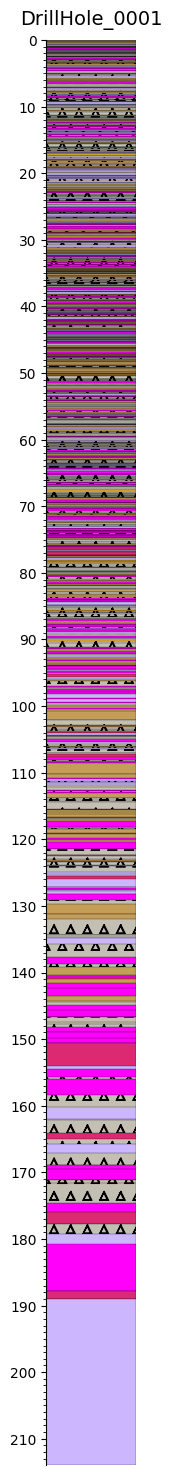

In [32]:
#vislualize the first drillhole

striplog = Striplog.from_csv(text=my_csv, lexicon=my_lexicon)

for iv in striplog:
    iv.components = [Component({'lithology': iv.data['lithology']})]
    iv.data = {'hole_id': iv.data['hole_id']}
    
striplog.plot(legend=my_legend,
              aspect=10,
              lw=0.2,
              #label='lithology',
              ladder=True)

plt.title('DrillHole_0001',
          loc='center',
          fontdict={'fontsize':14},
          y=1.005
        );

#plt.savefig('test.jpeg',bbox_inches="tight")

In [33]:
striplog[0]


Interval({'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}), 'base': Position({'middle': 3.05, 'units': 'm'}), 'description': '', 'data': {'hole_id': 'DrillHole_0001'}, 'components': [Component({'lithology': 'Solo Marrom'})]})

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\striplog\striplog.py:1637: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(width, aspect*width))


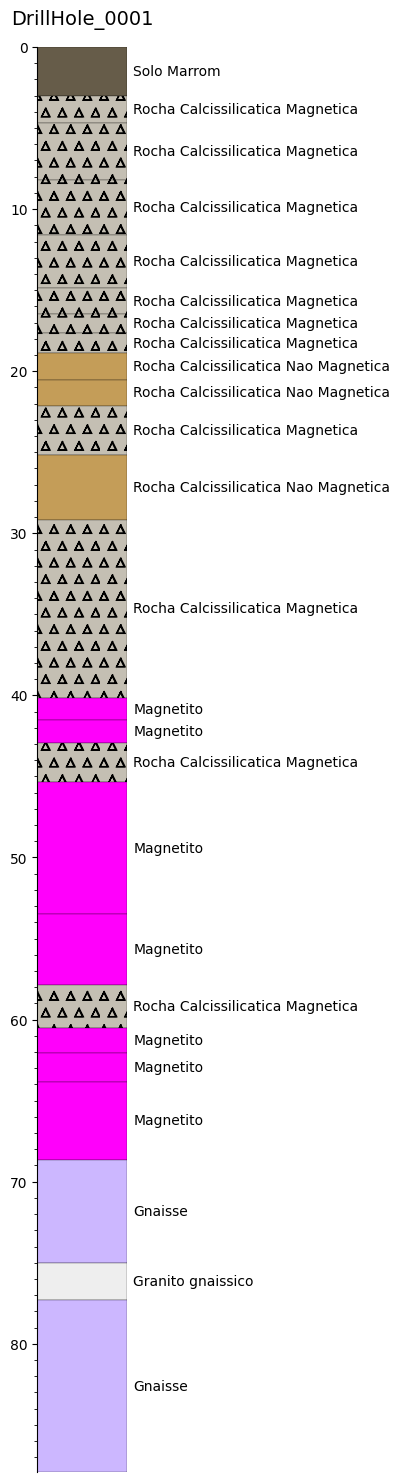

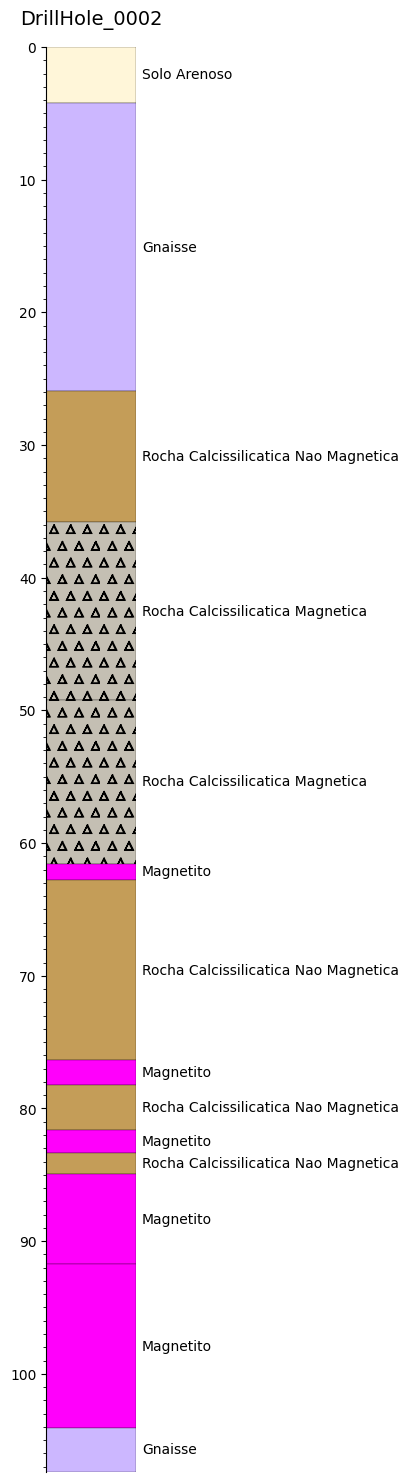

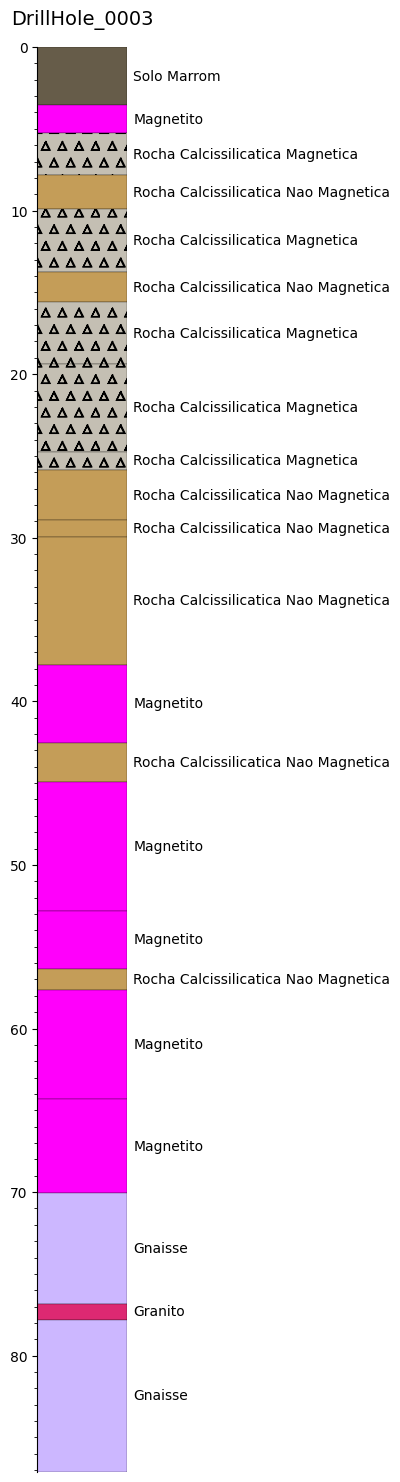

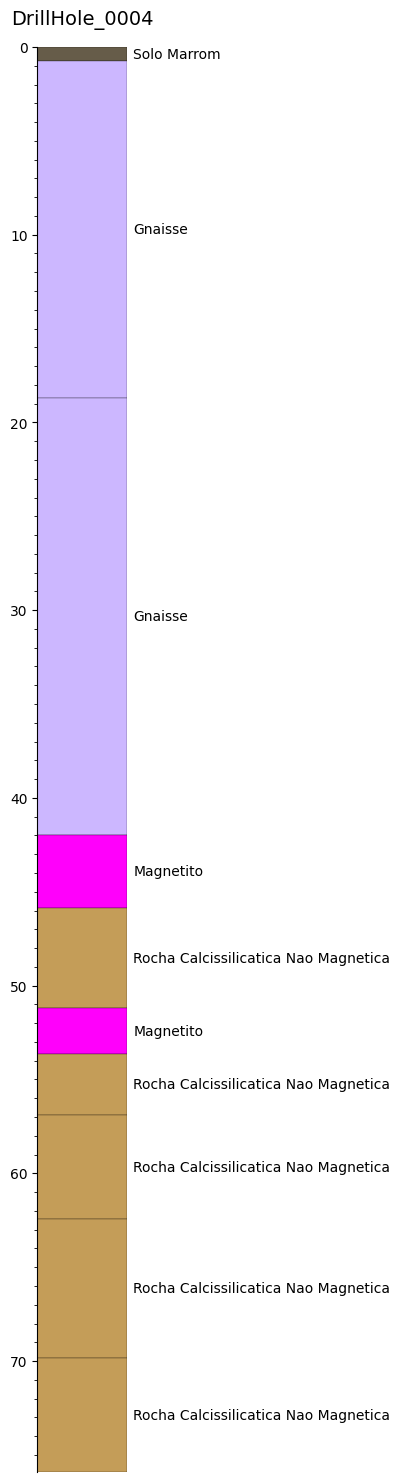

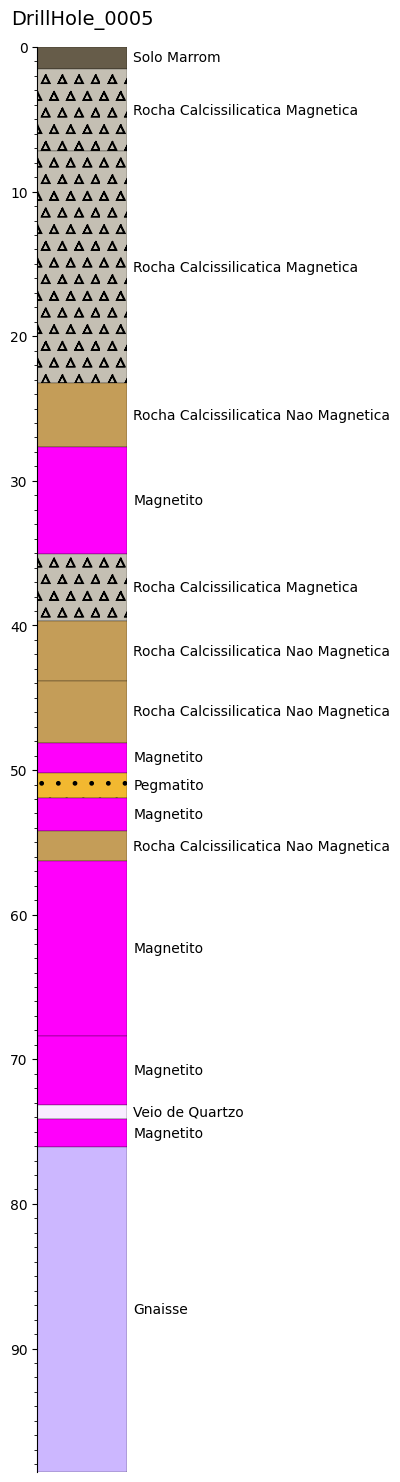

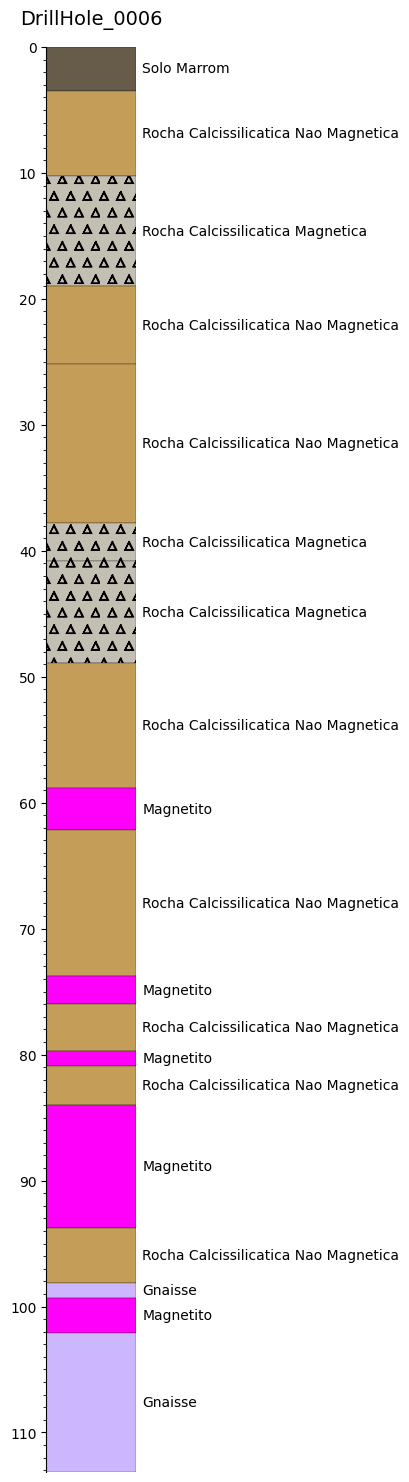

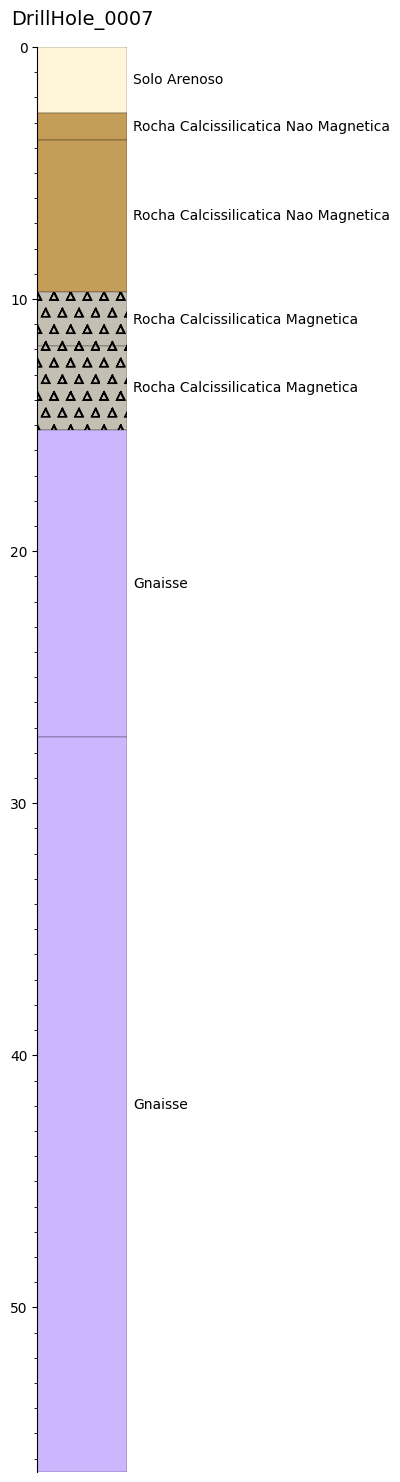

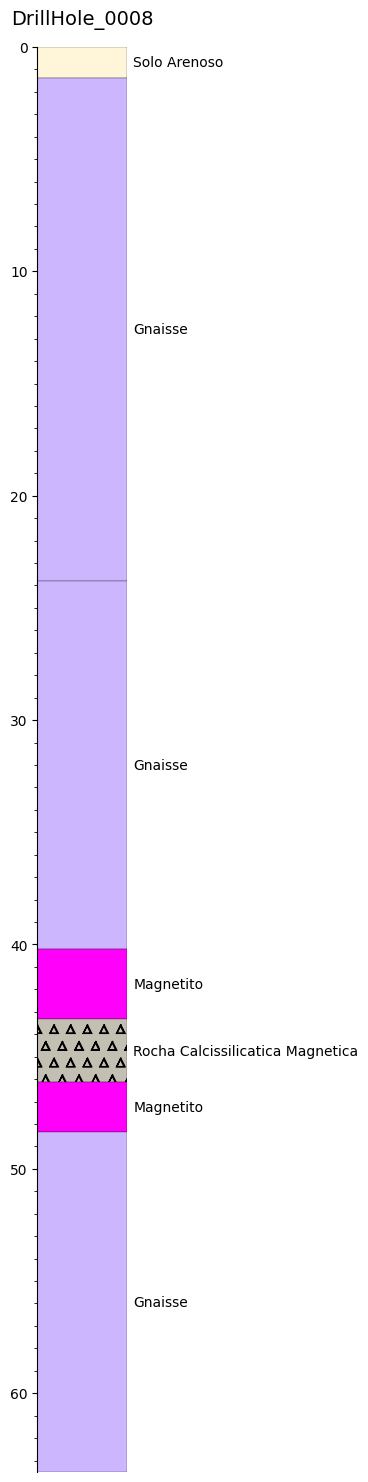

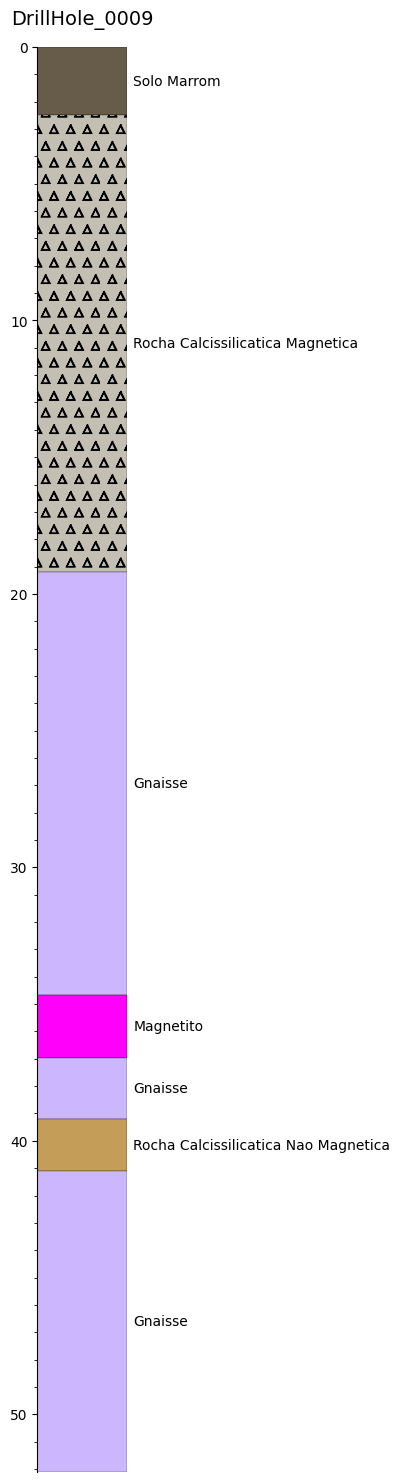

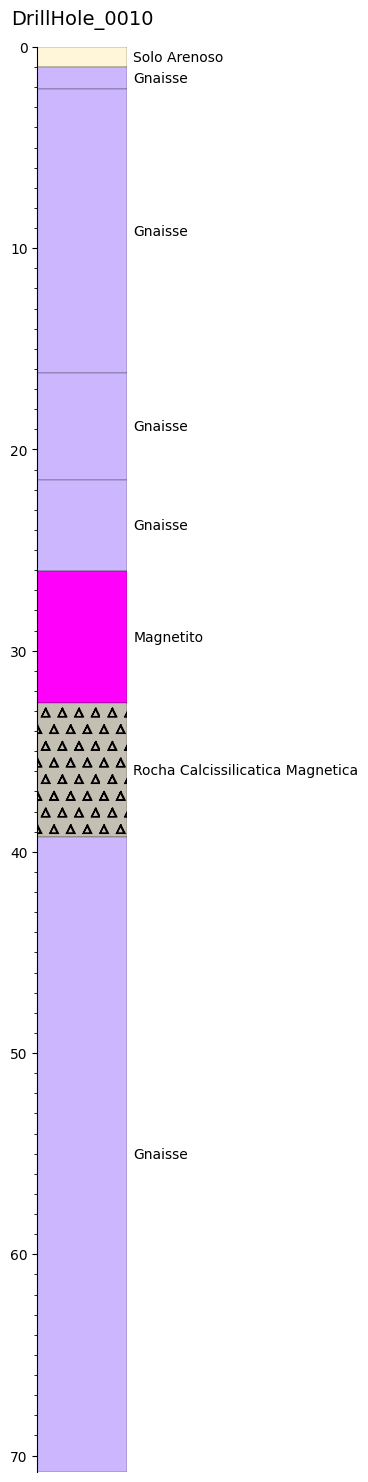

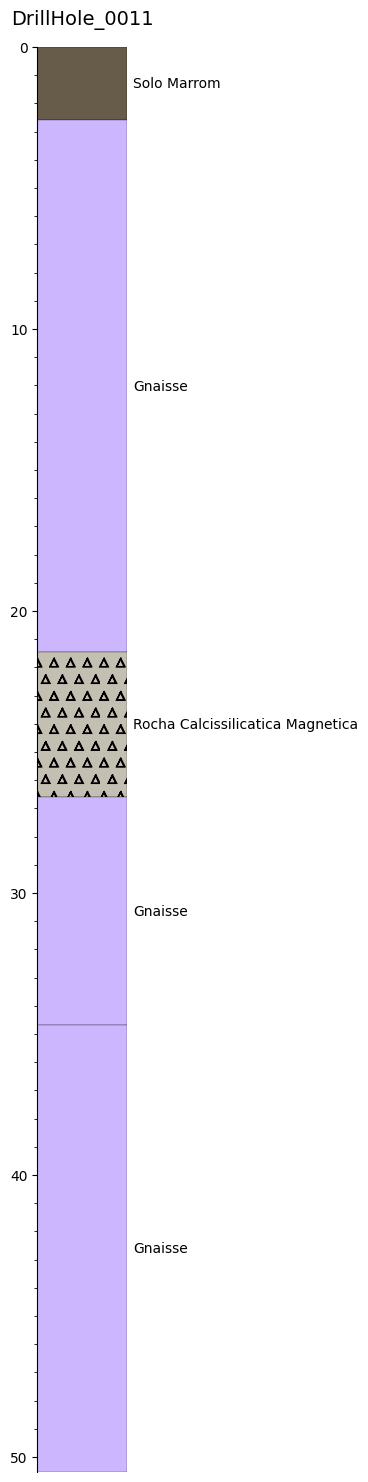

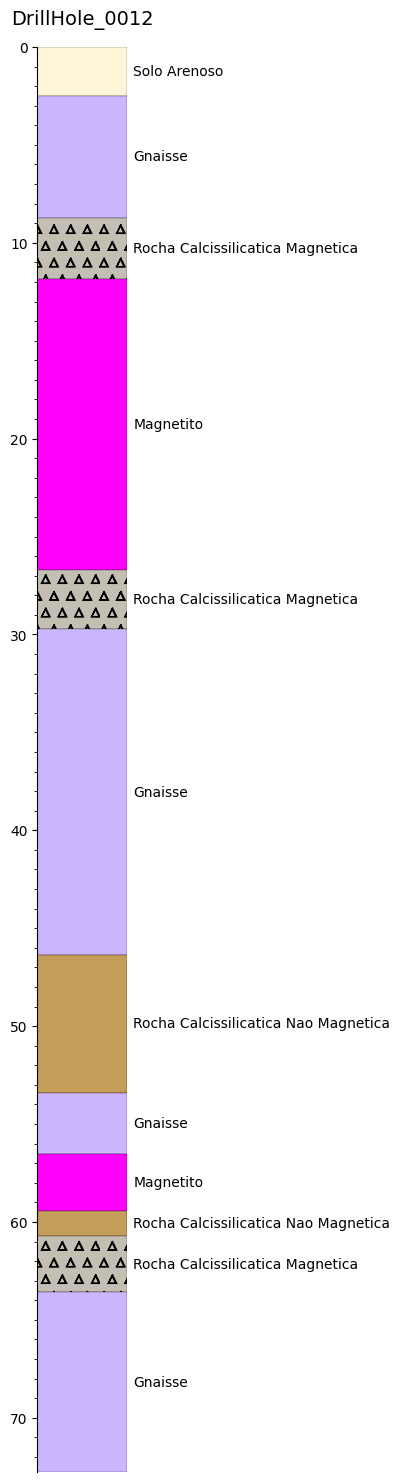

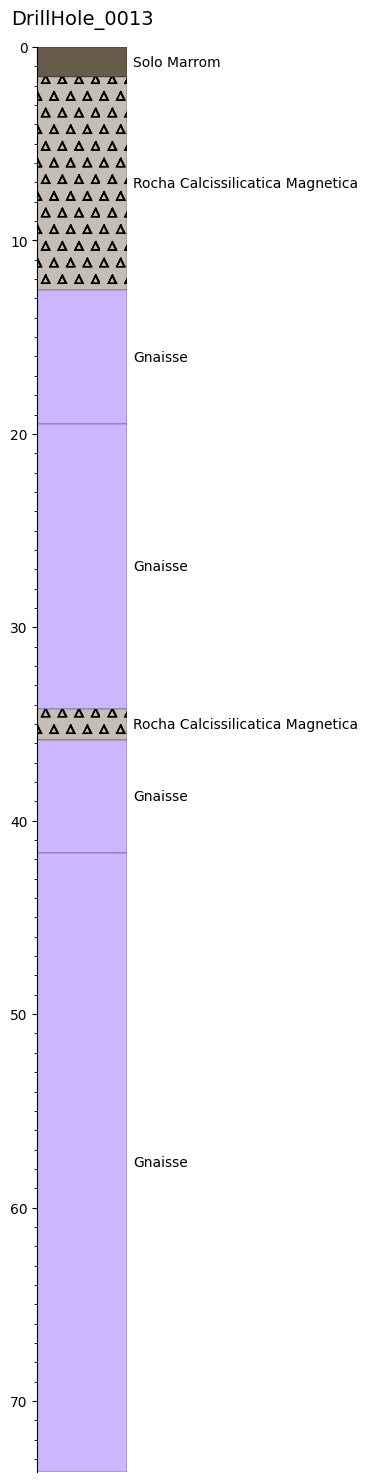

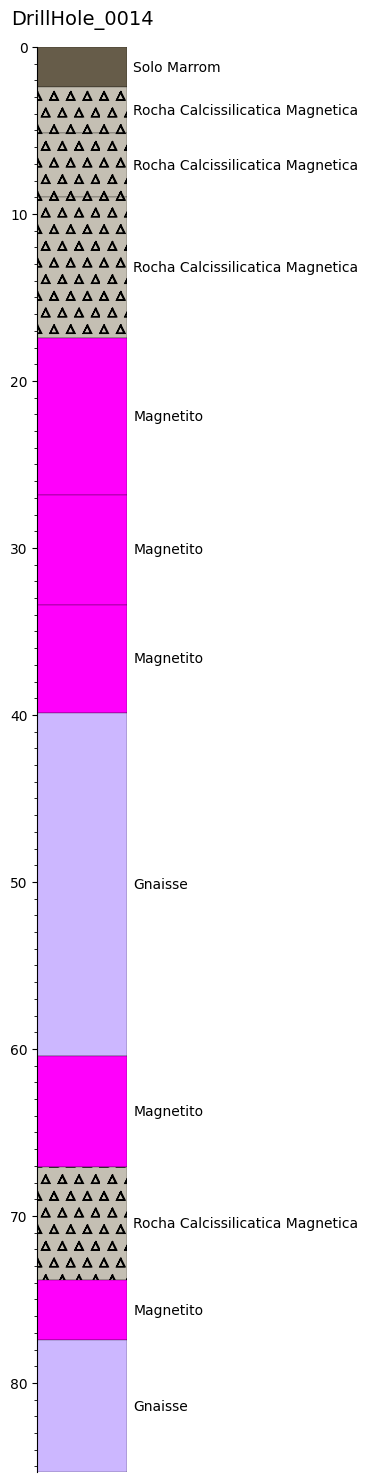

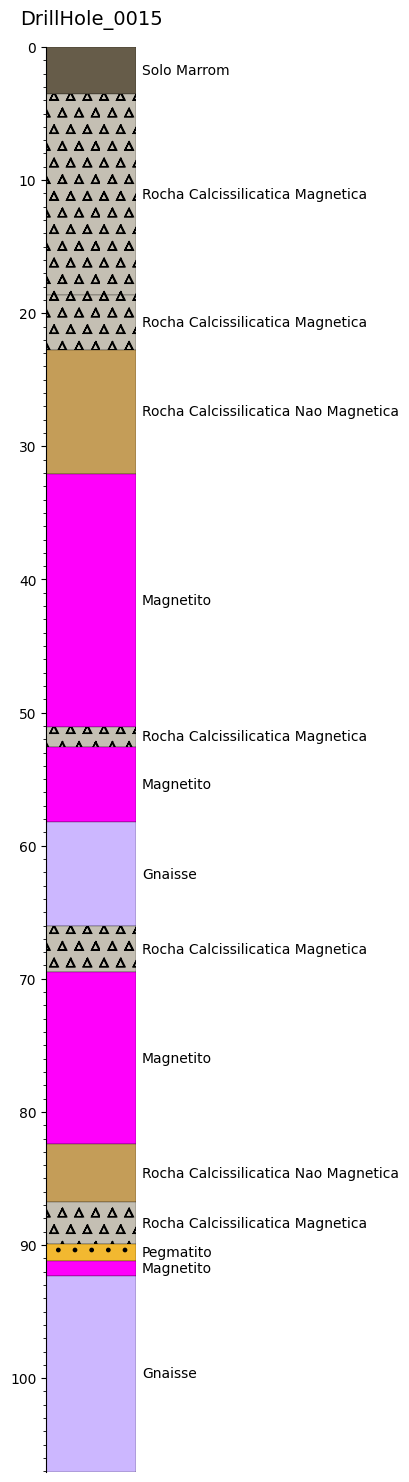

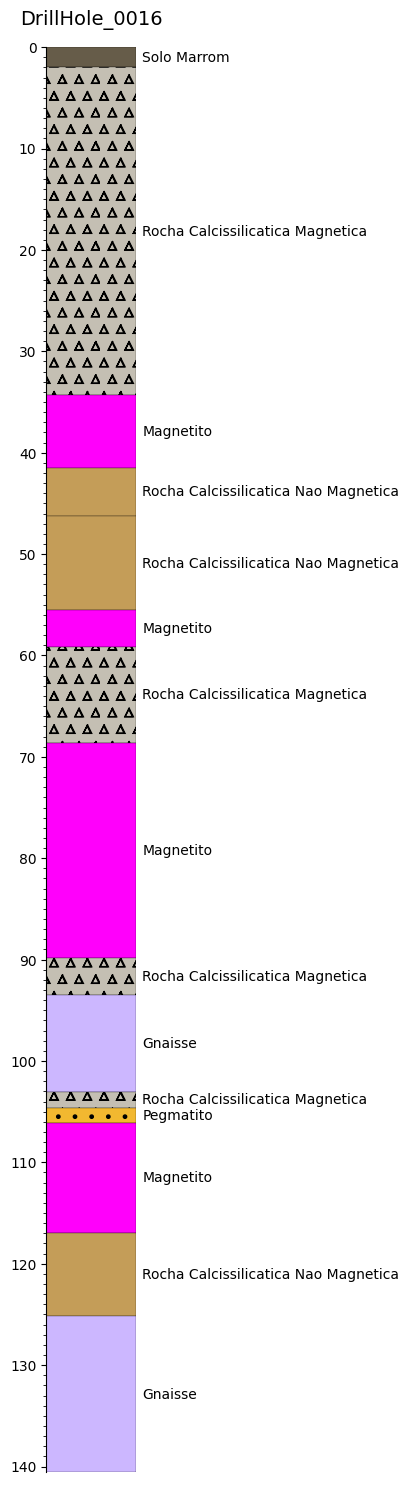

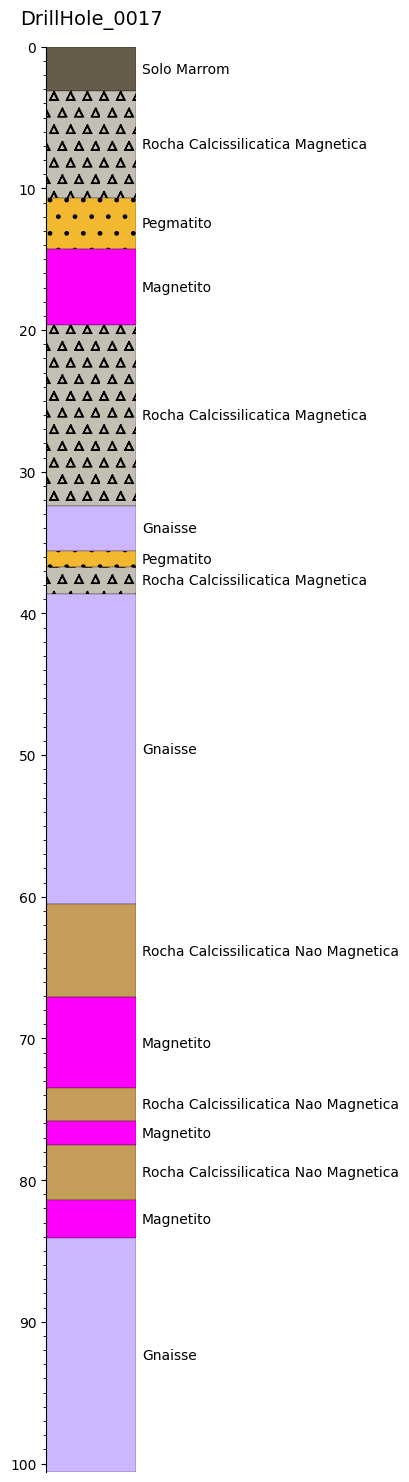

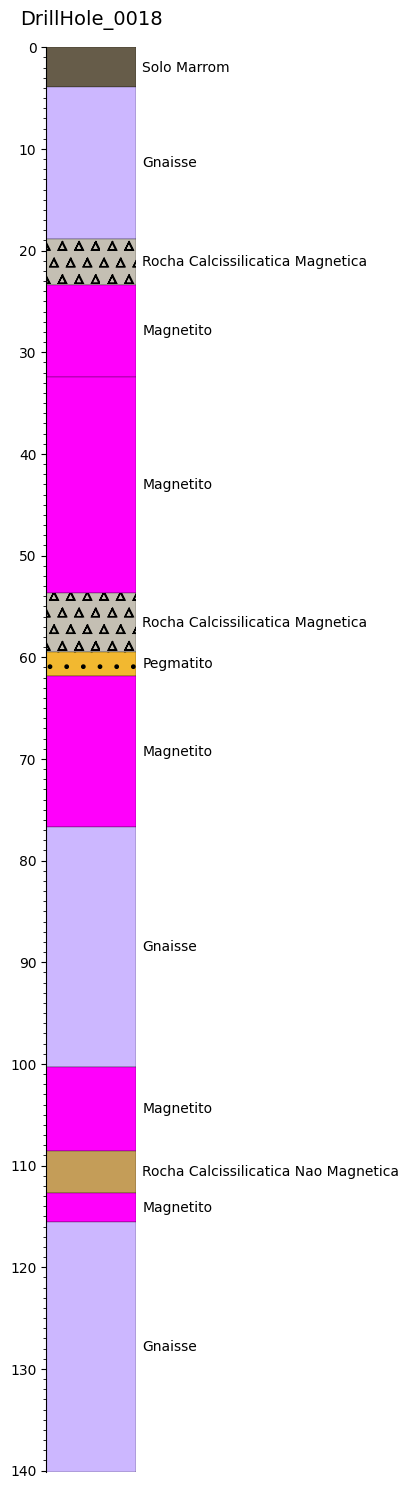

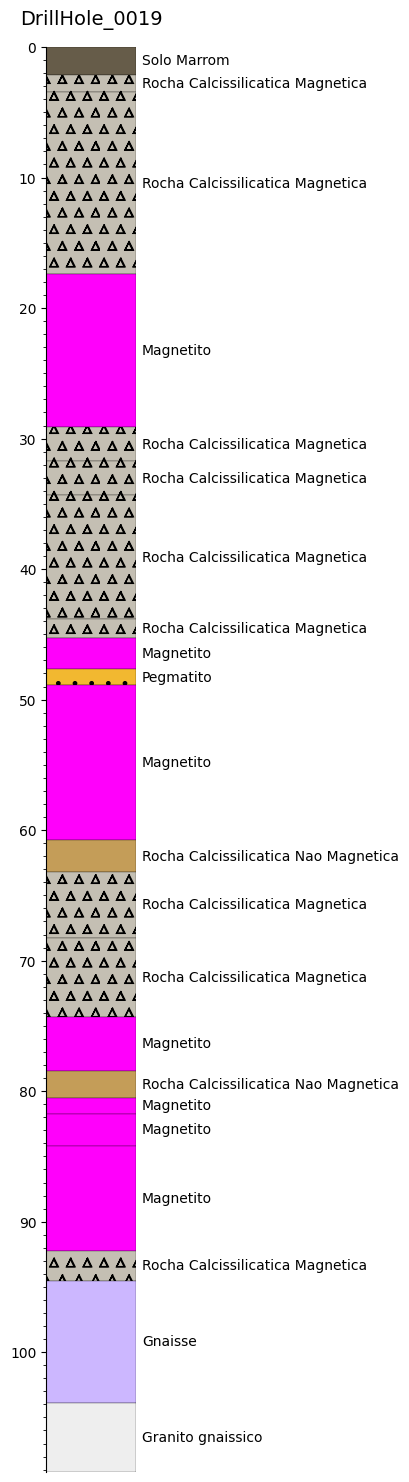

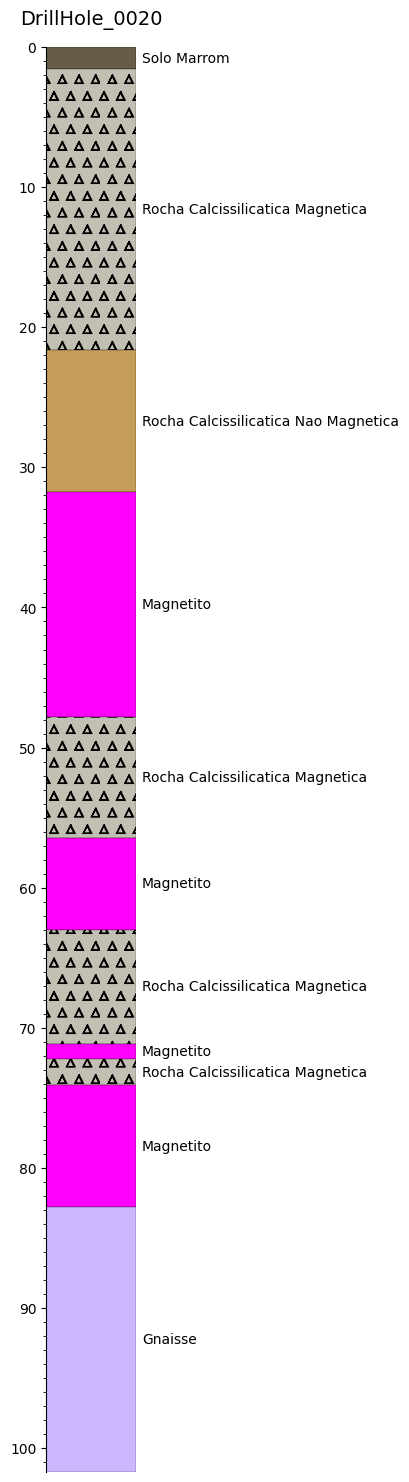

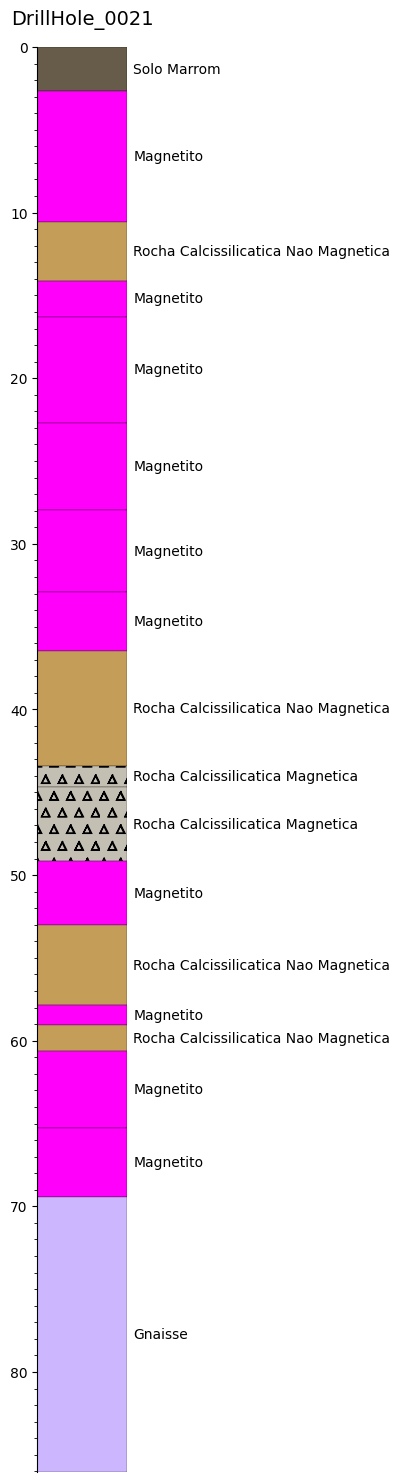

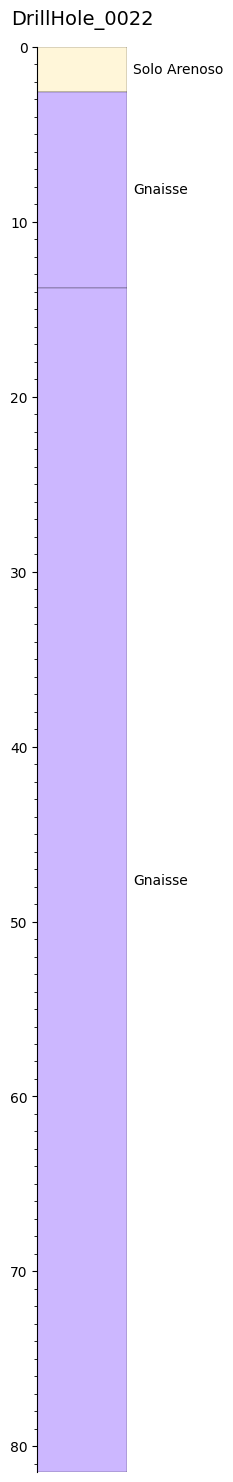

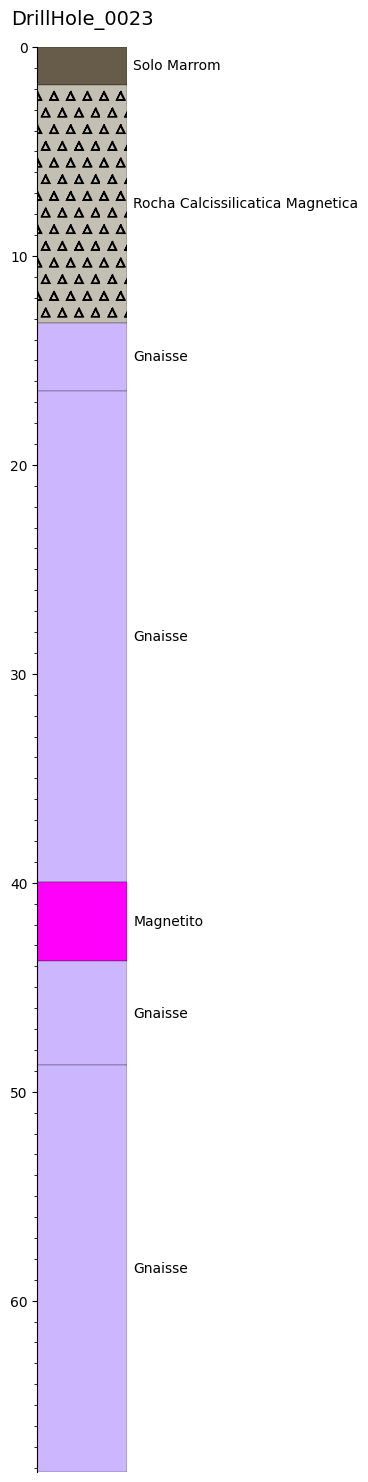

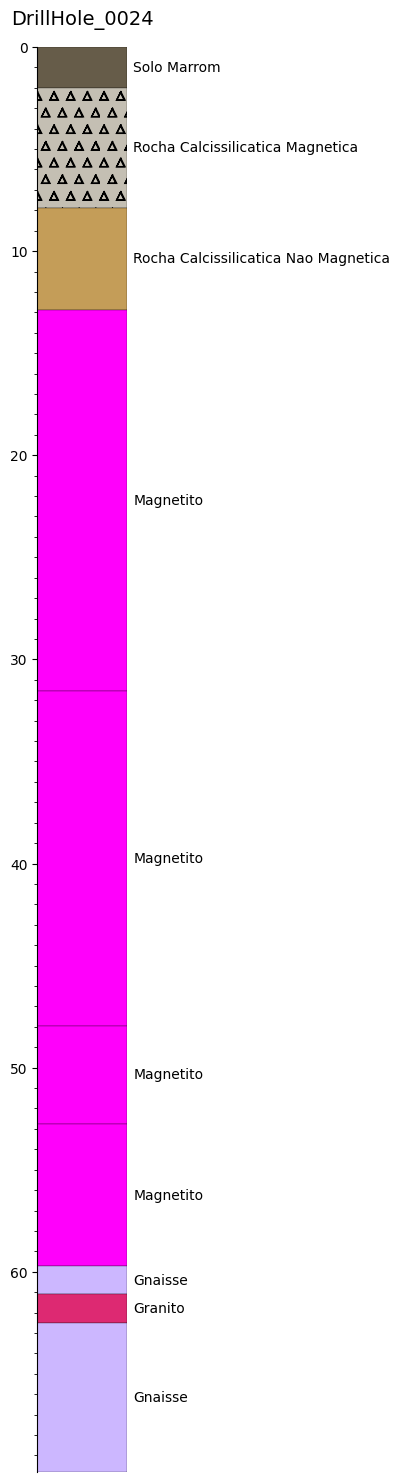

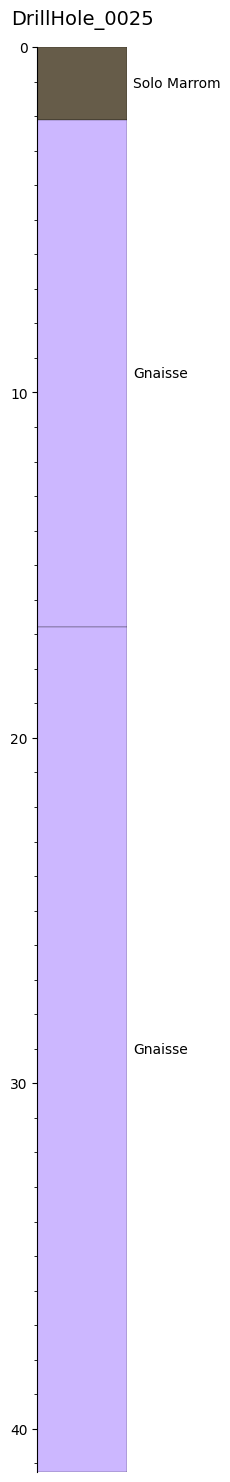

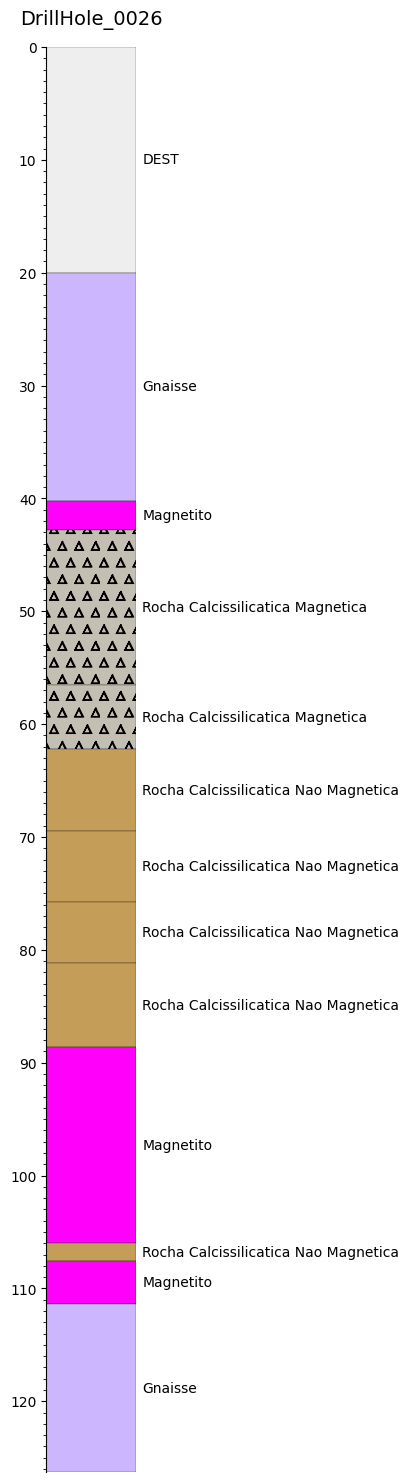

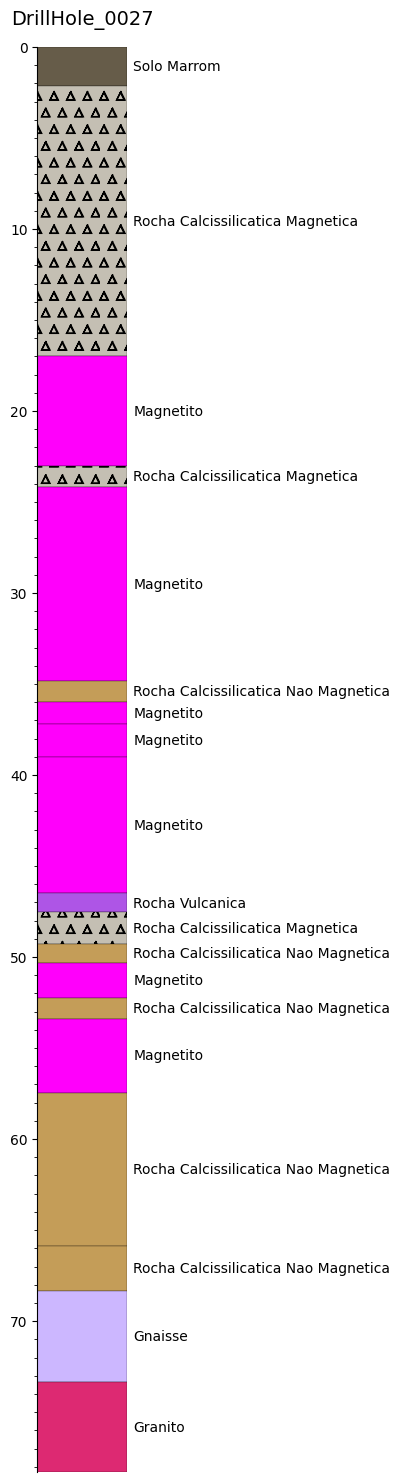

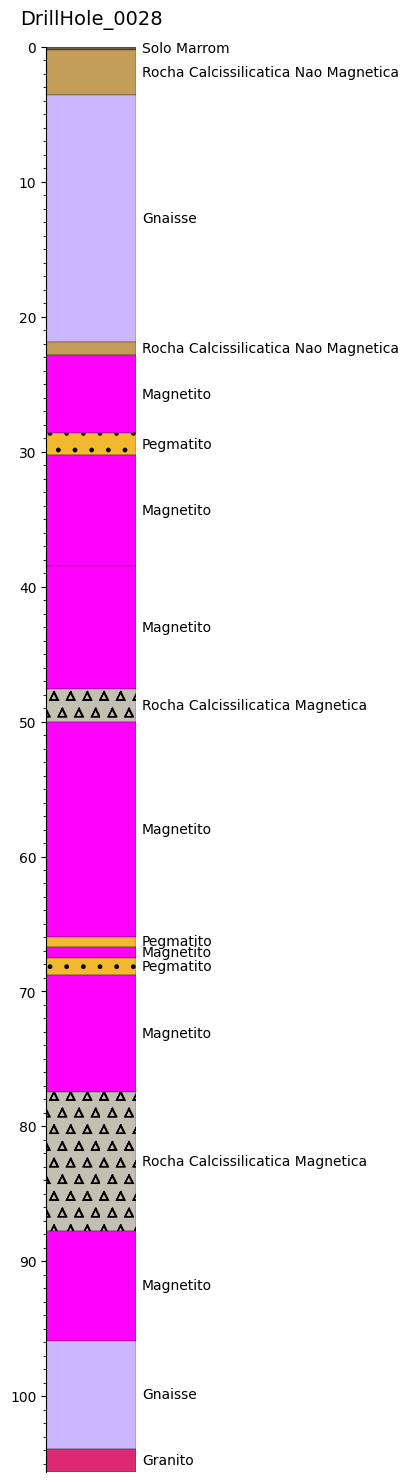

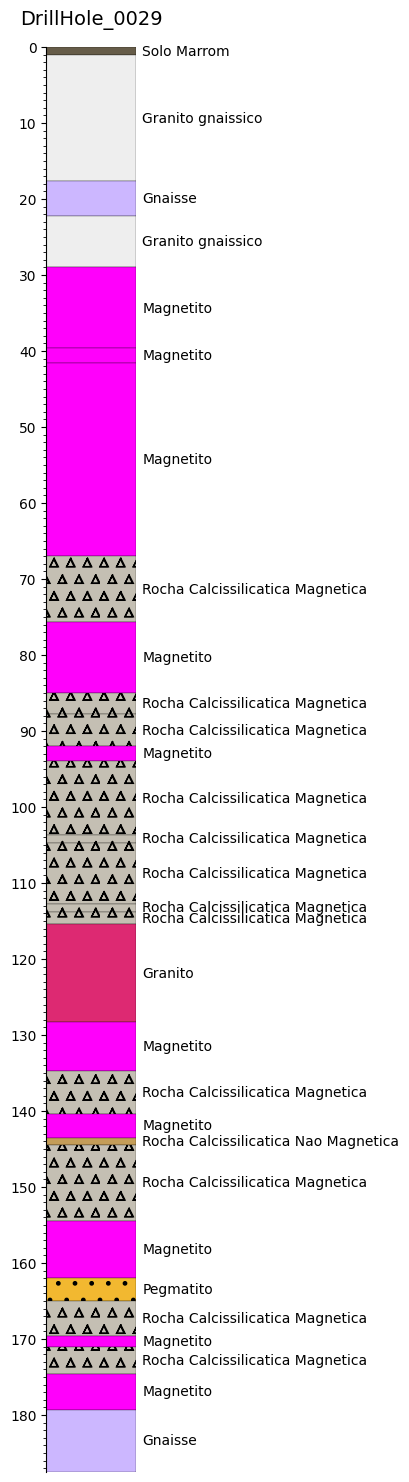

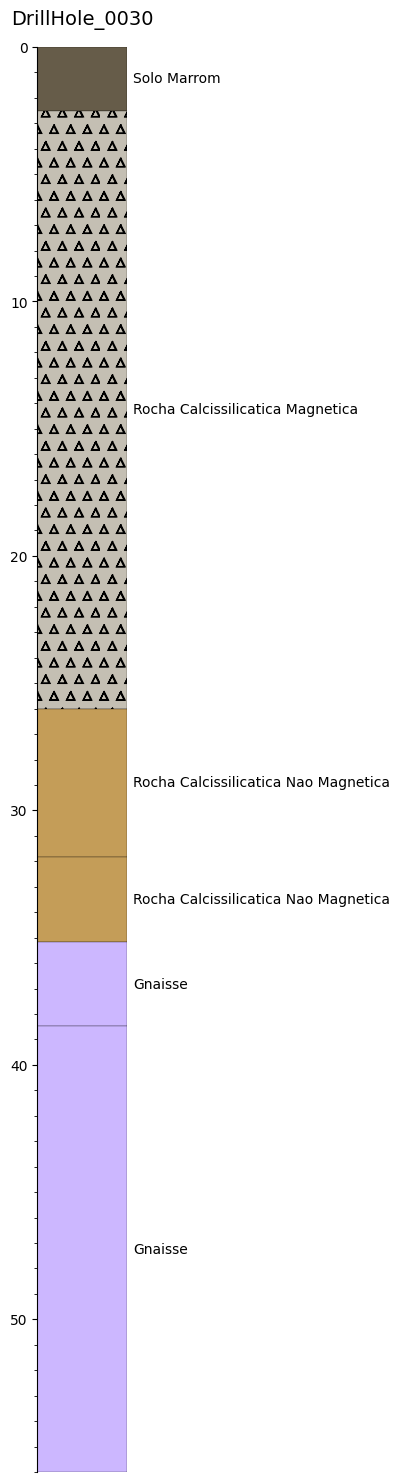

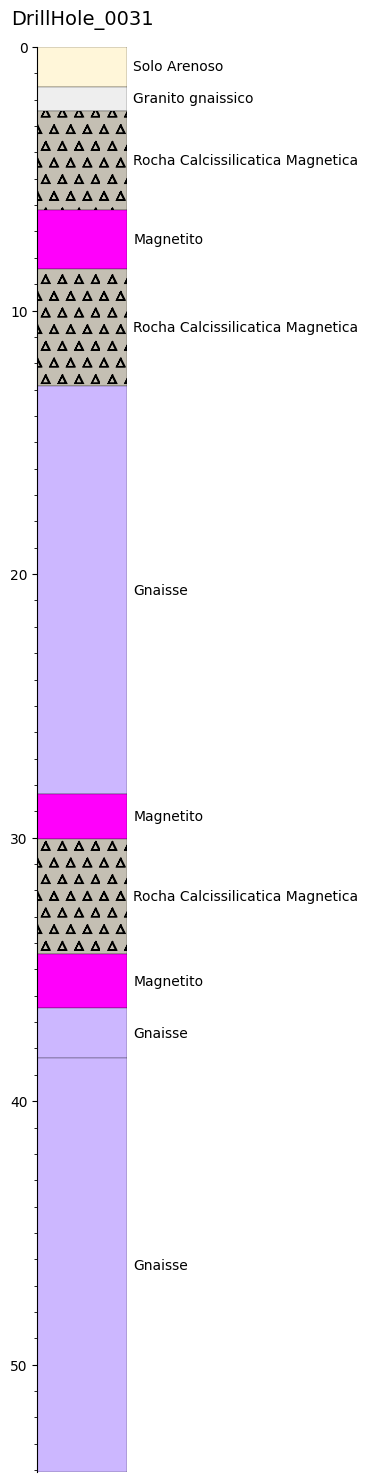

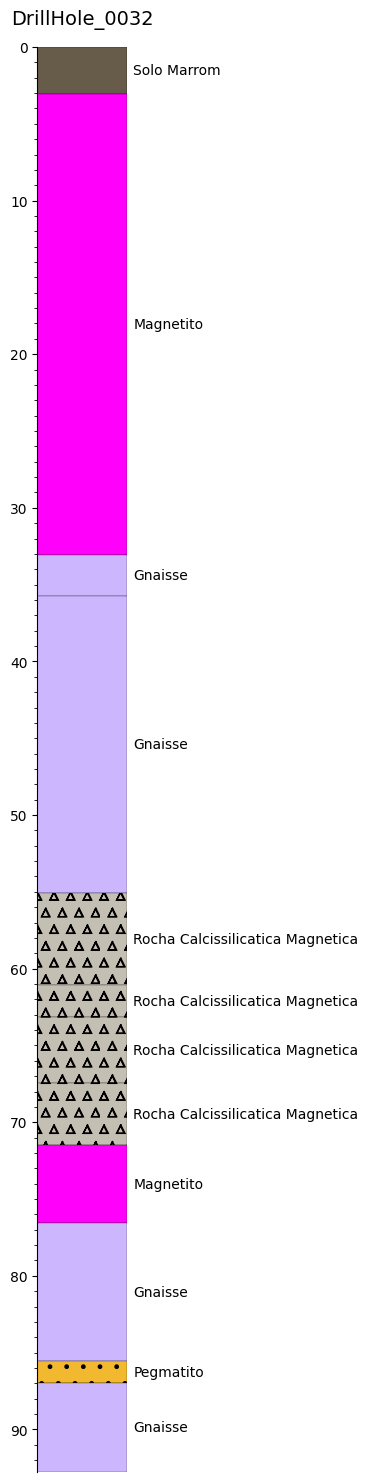

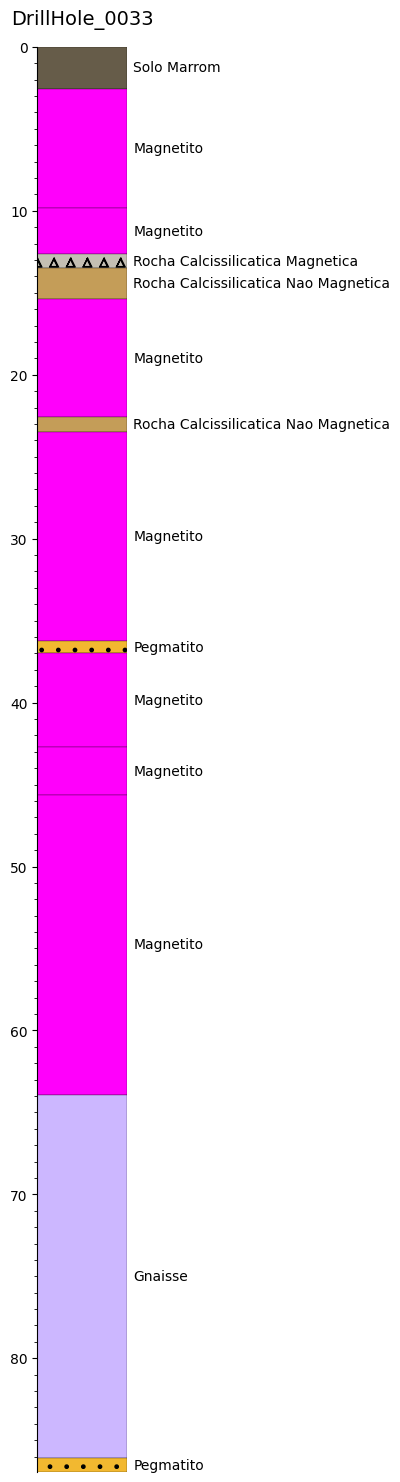

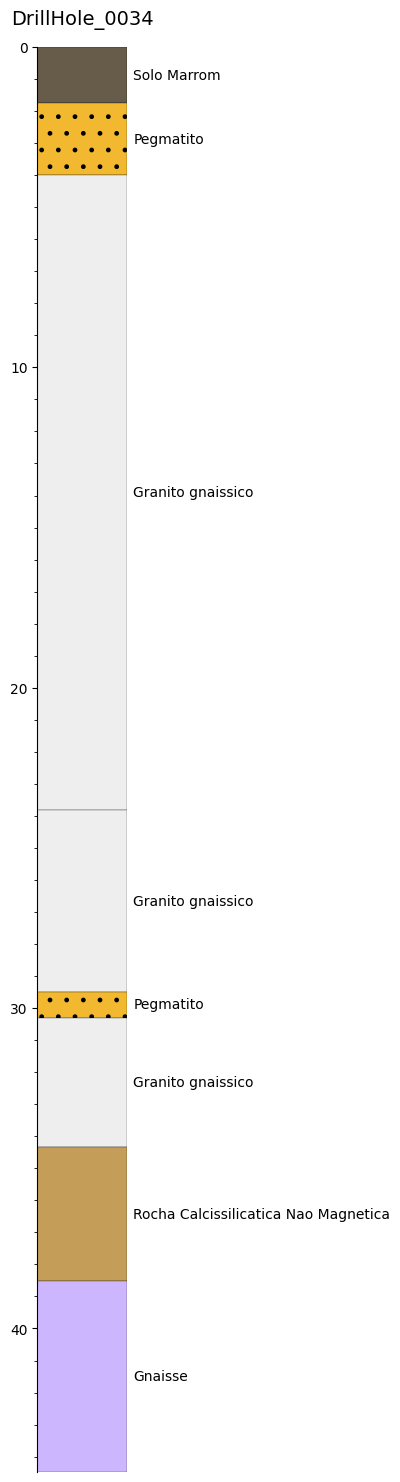

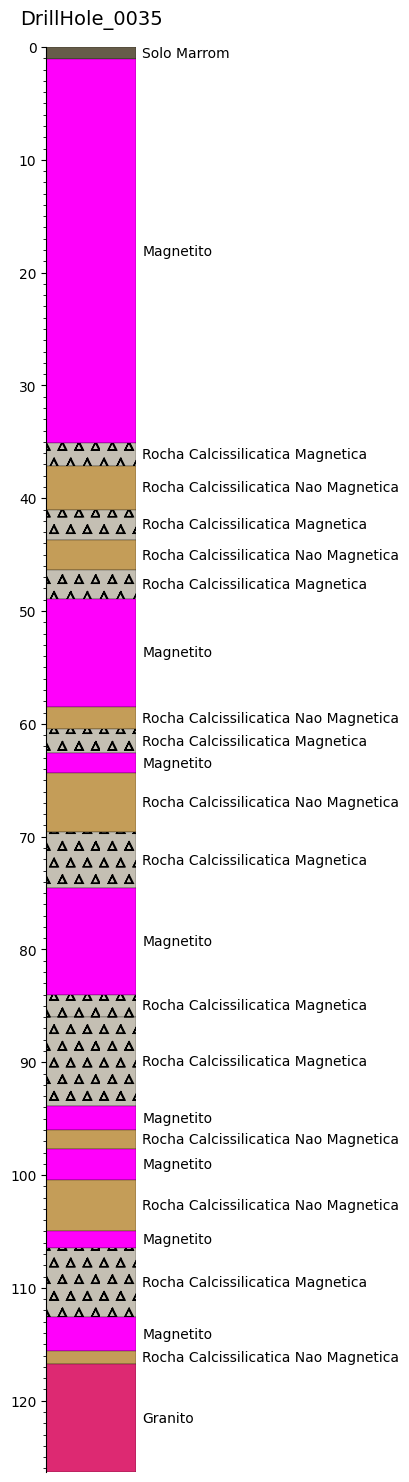

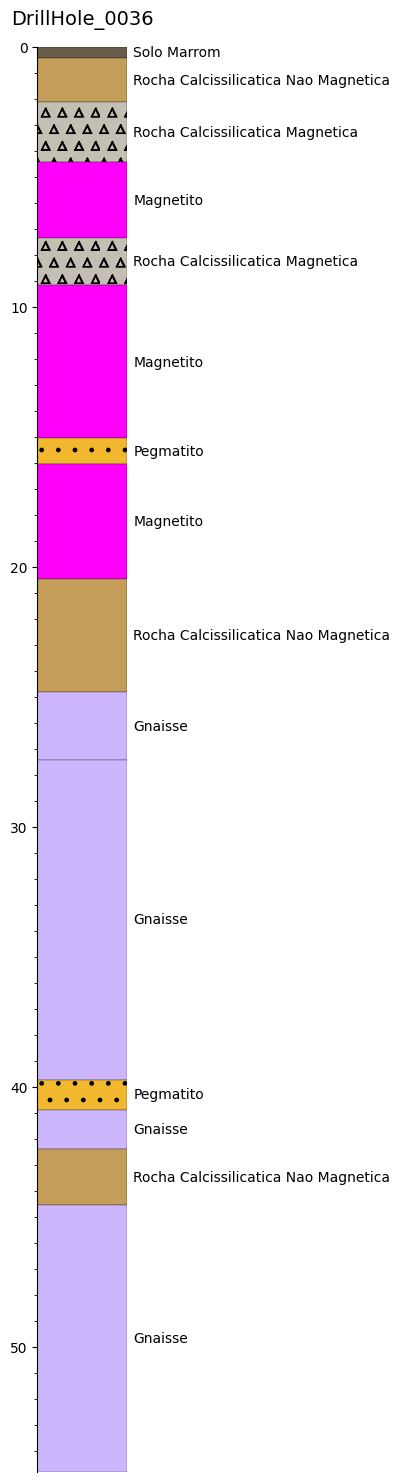

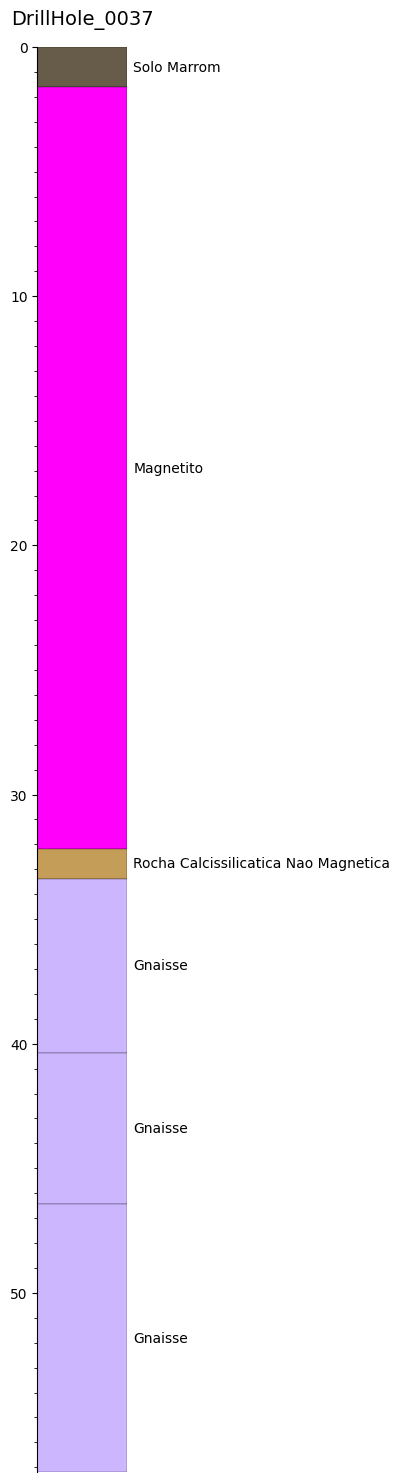

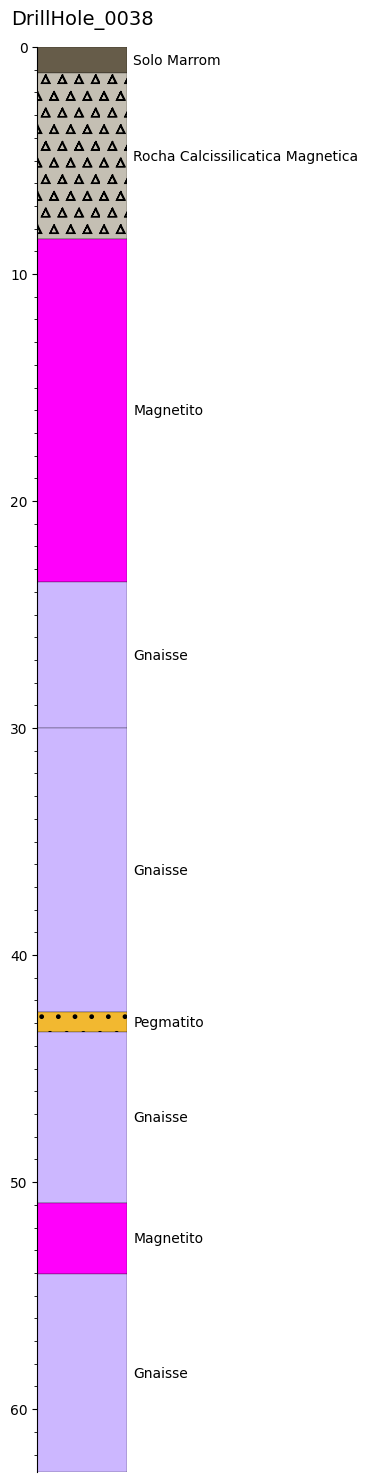

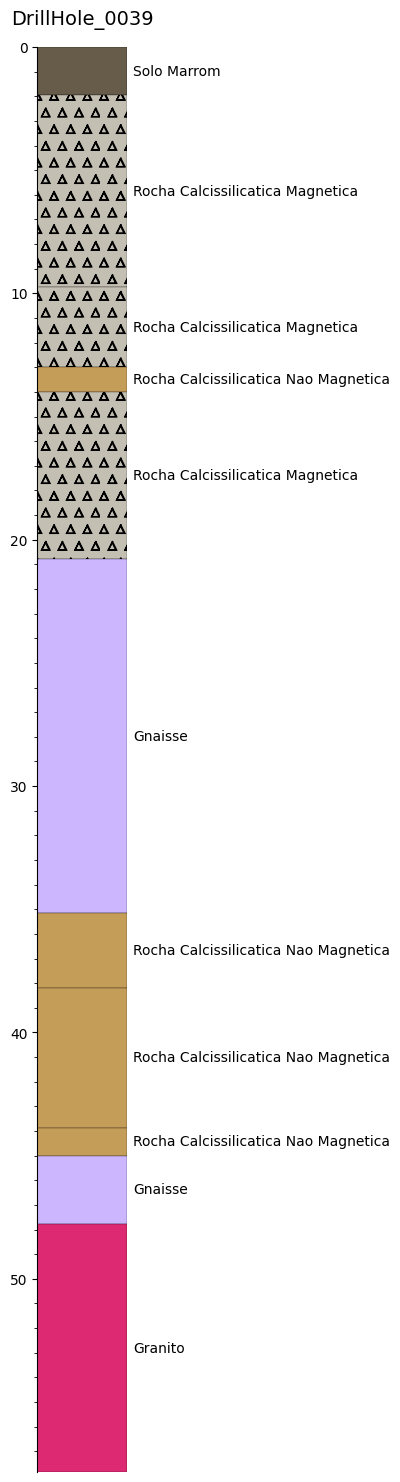

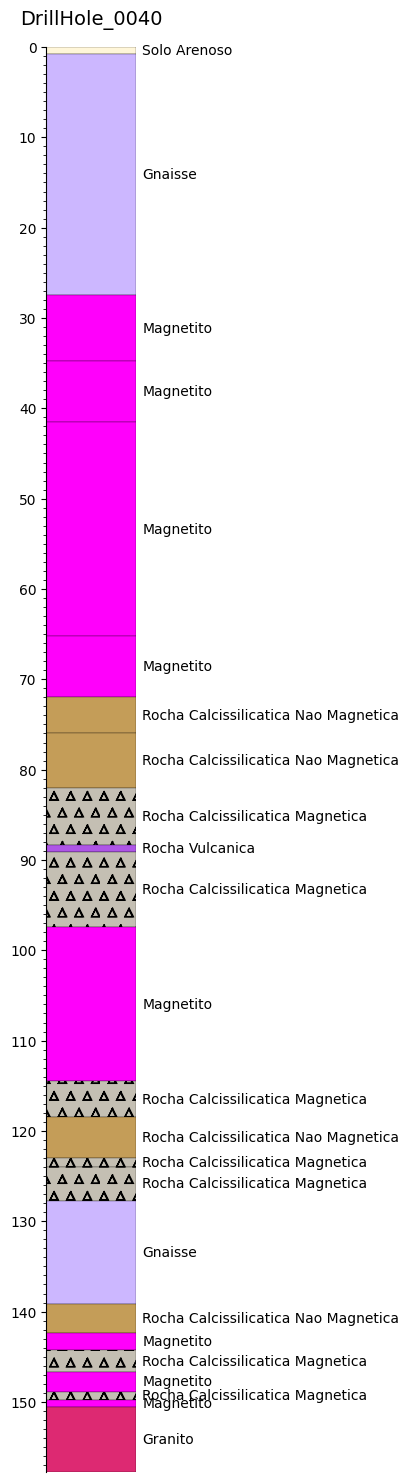

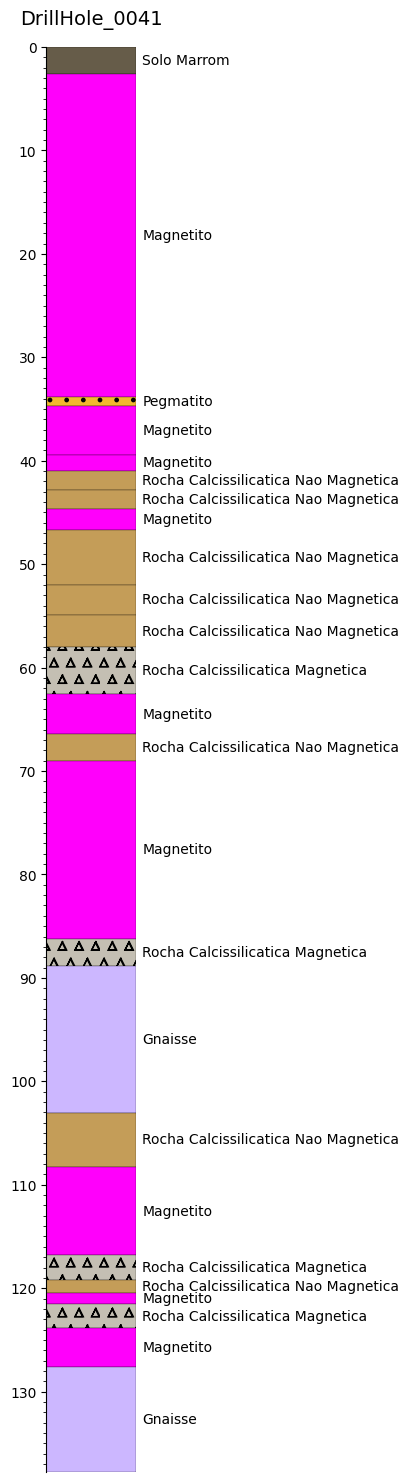

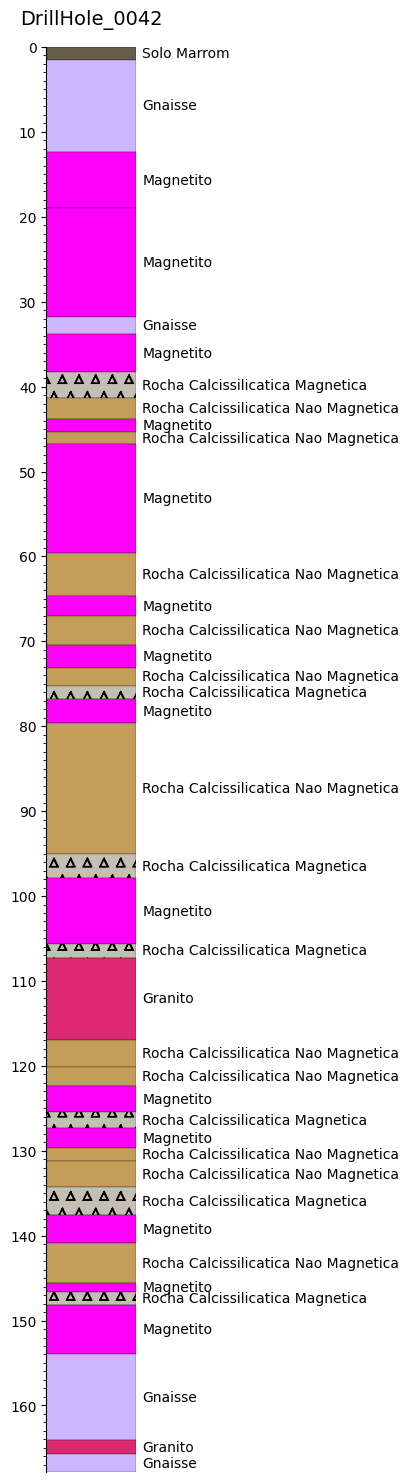

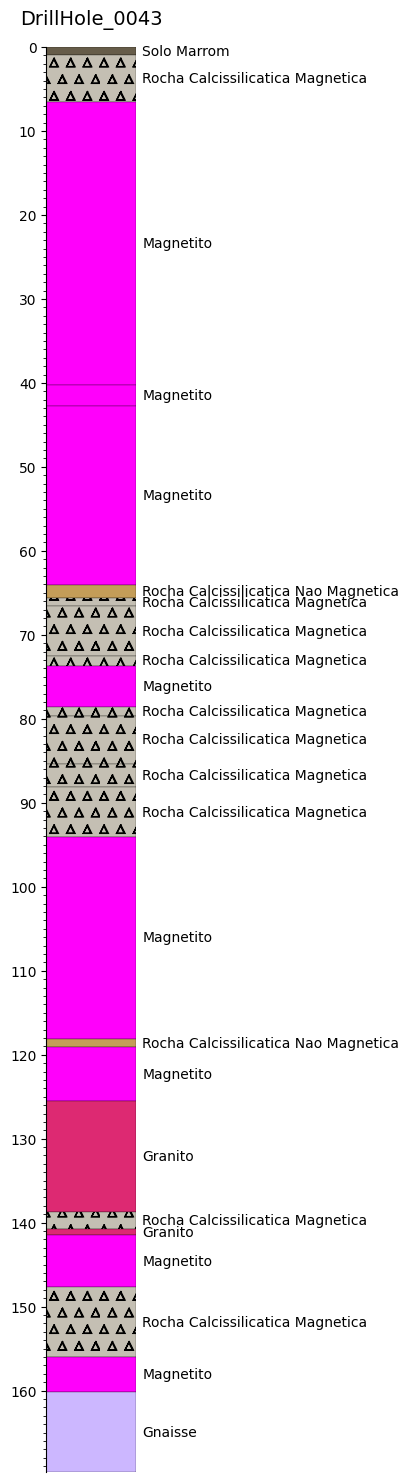

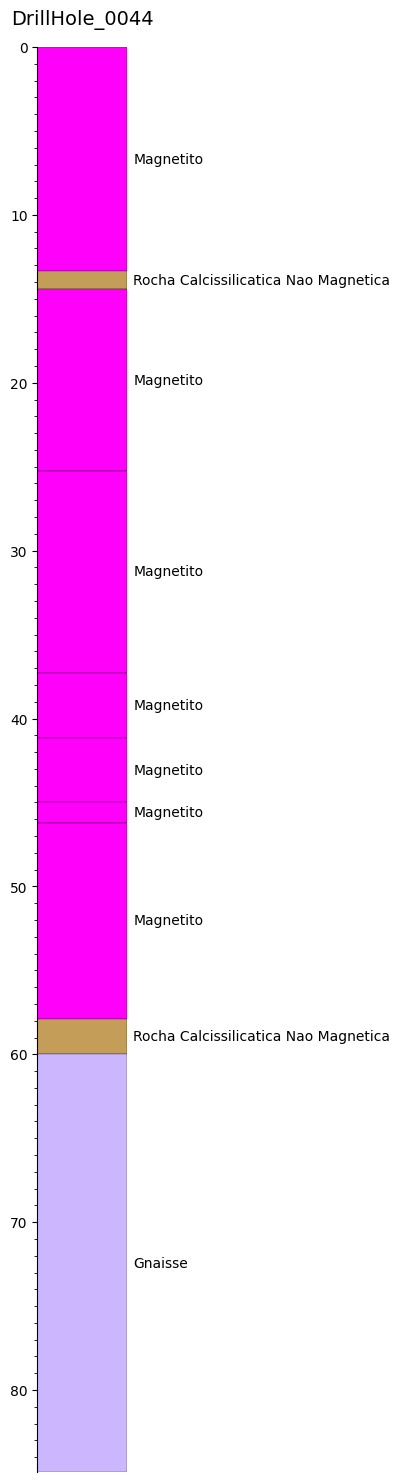

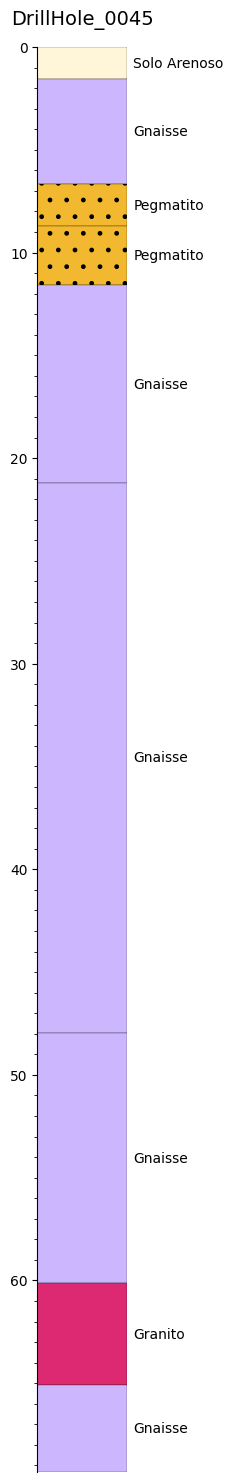

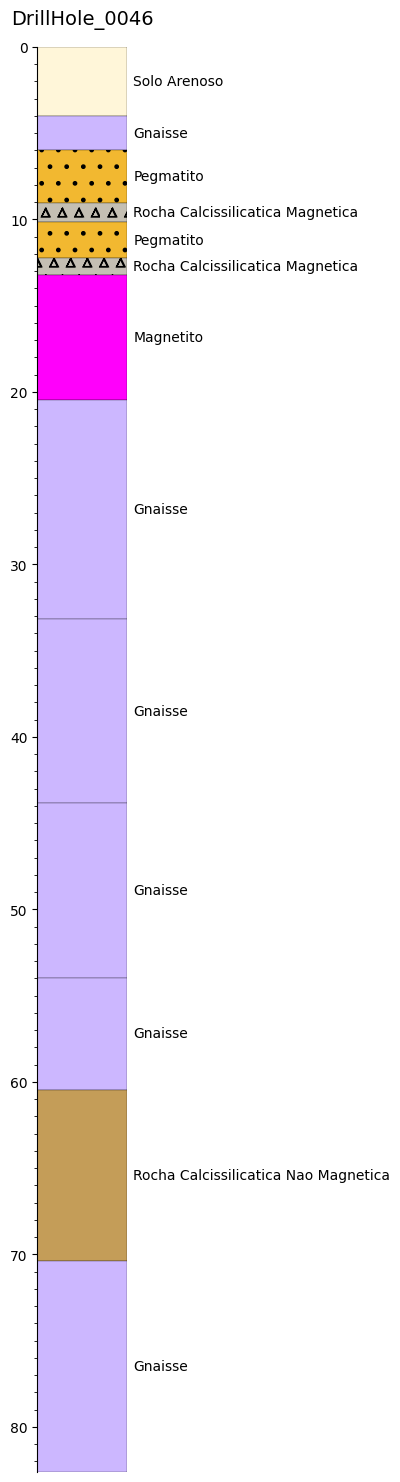

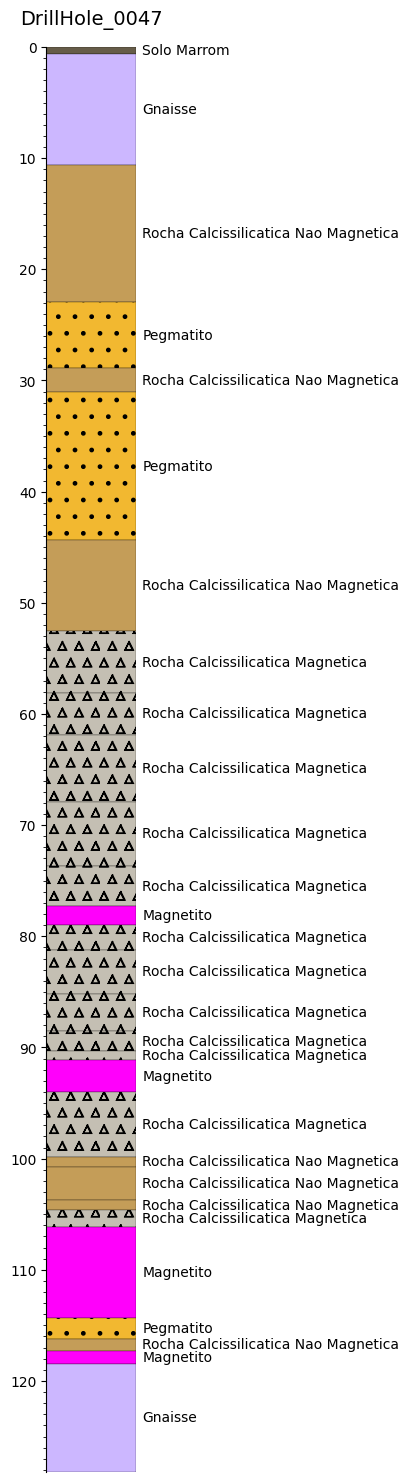

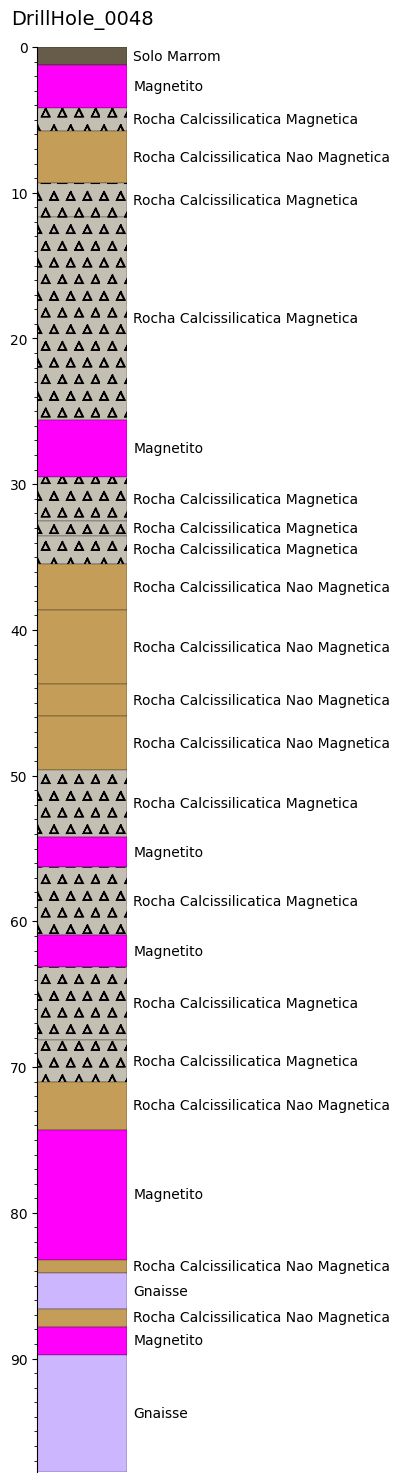

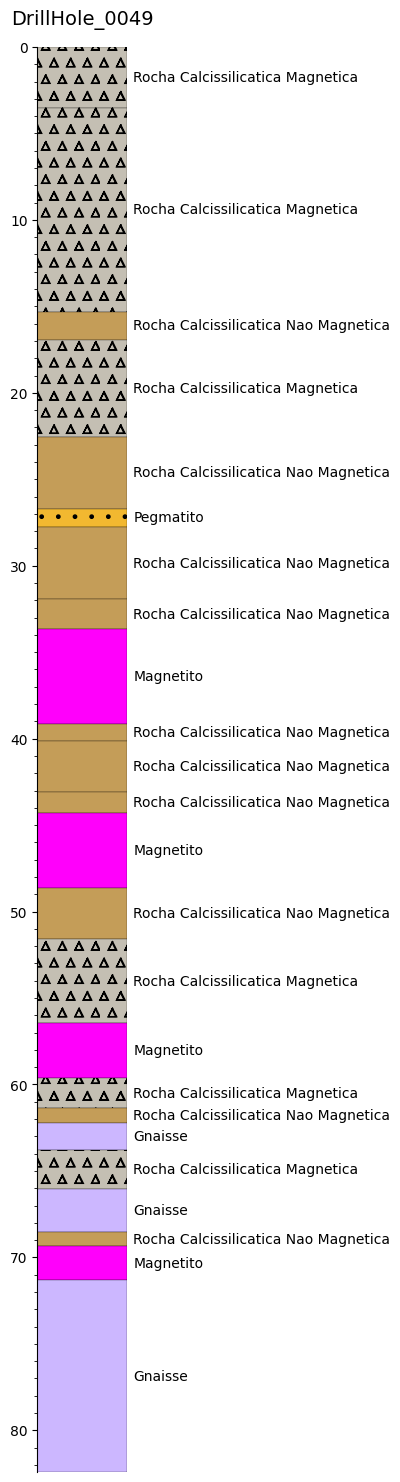

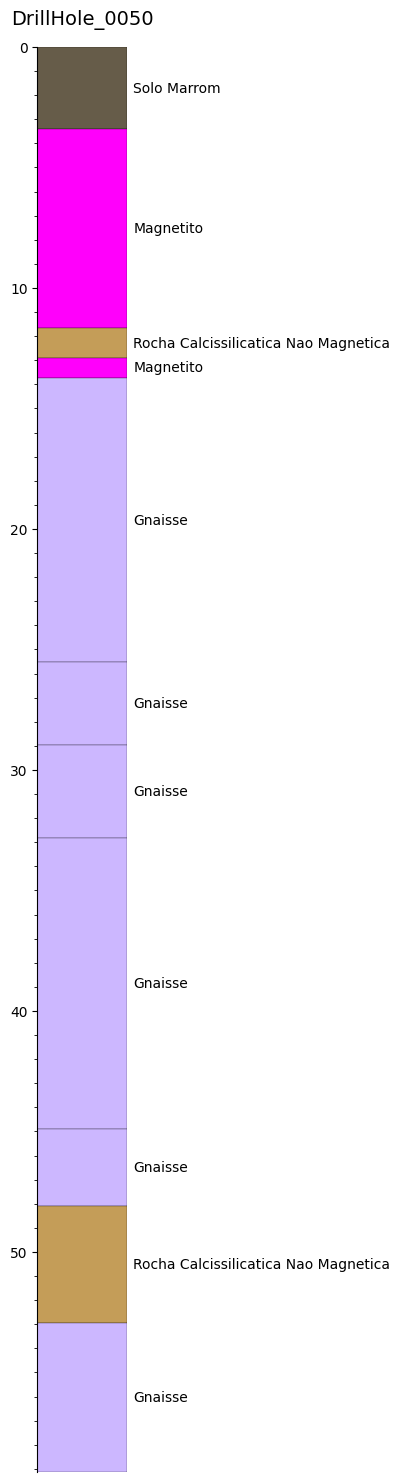

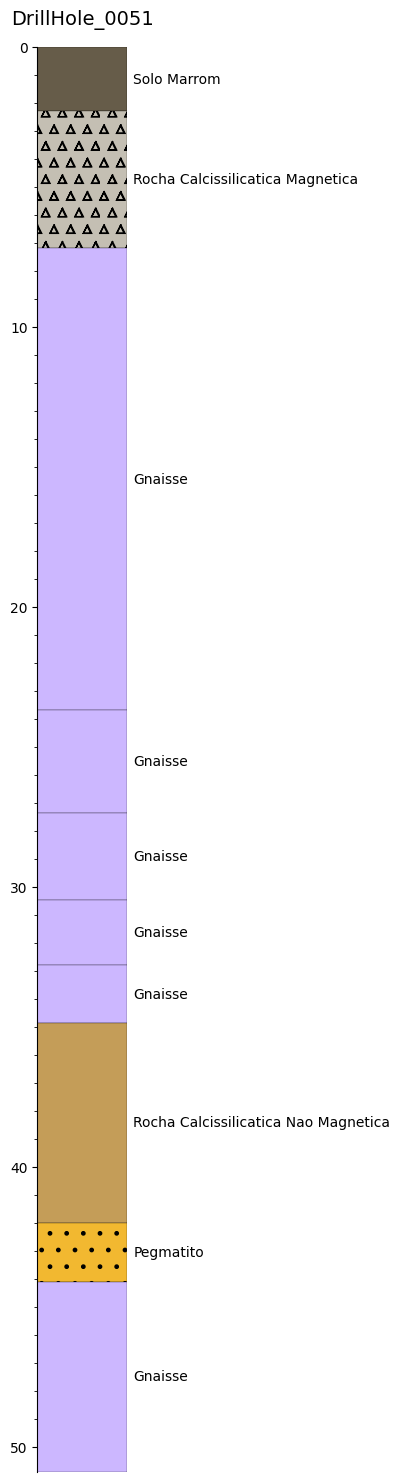

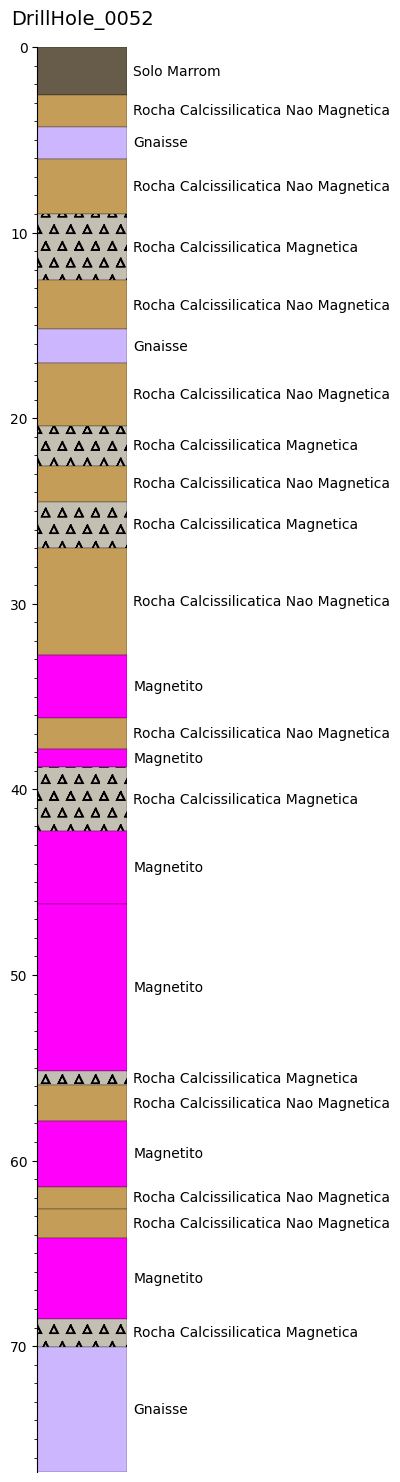

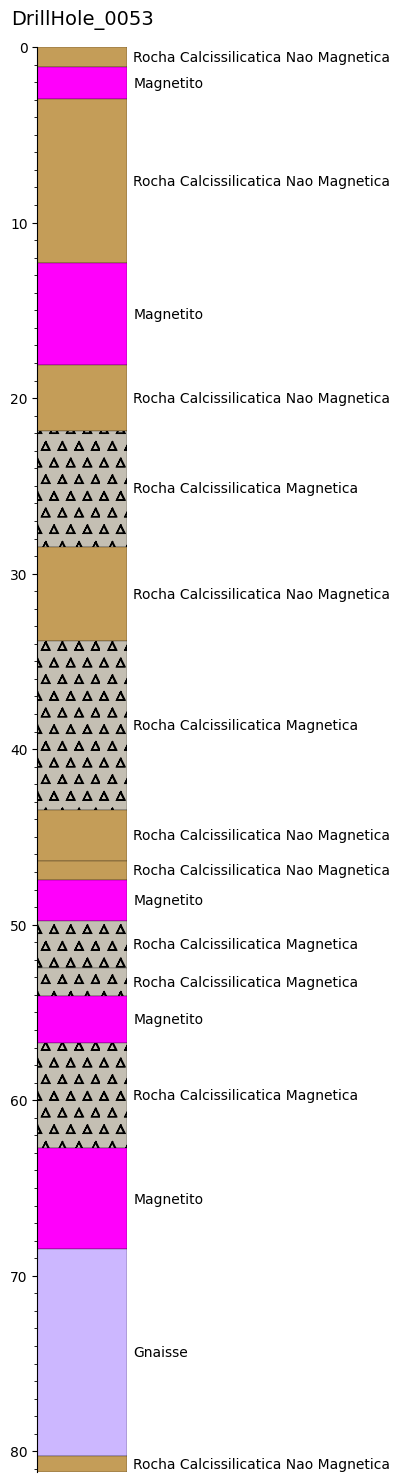

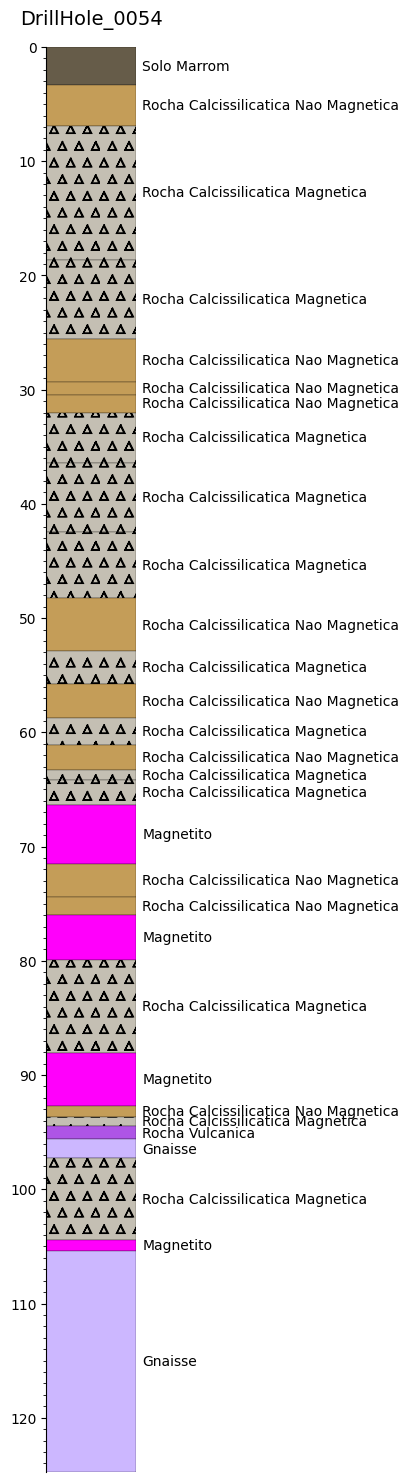

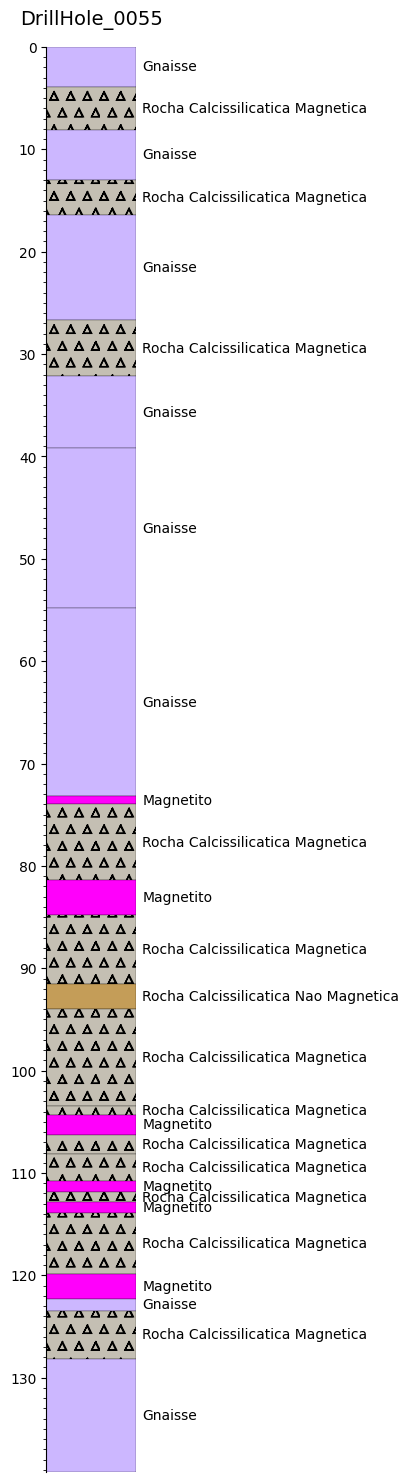

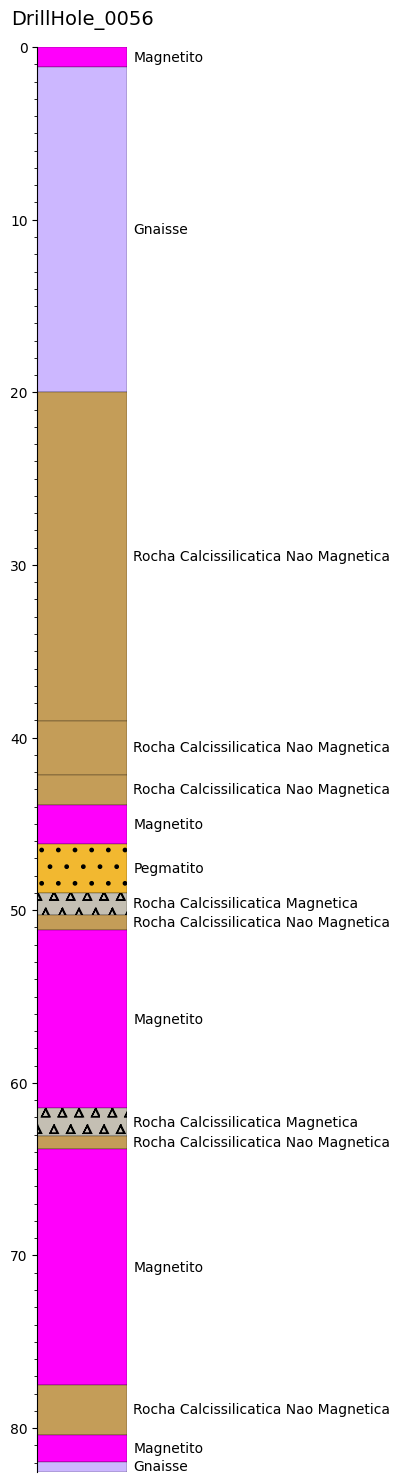

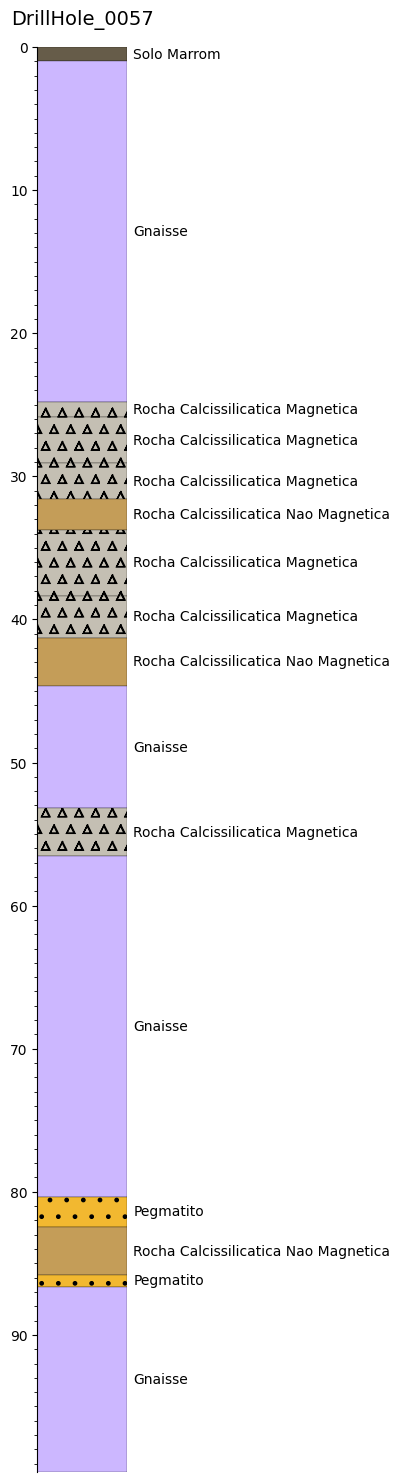

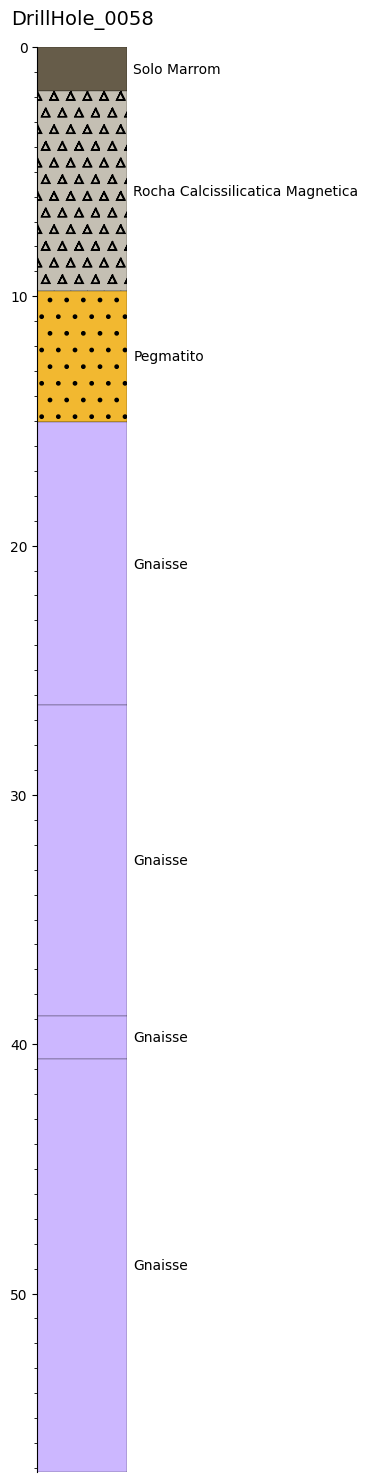

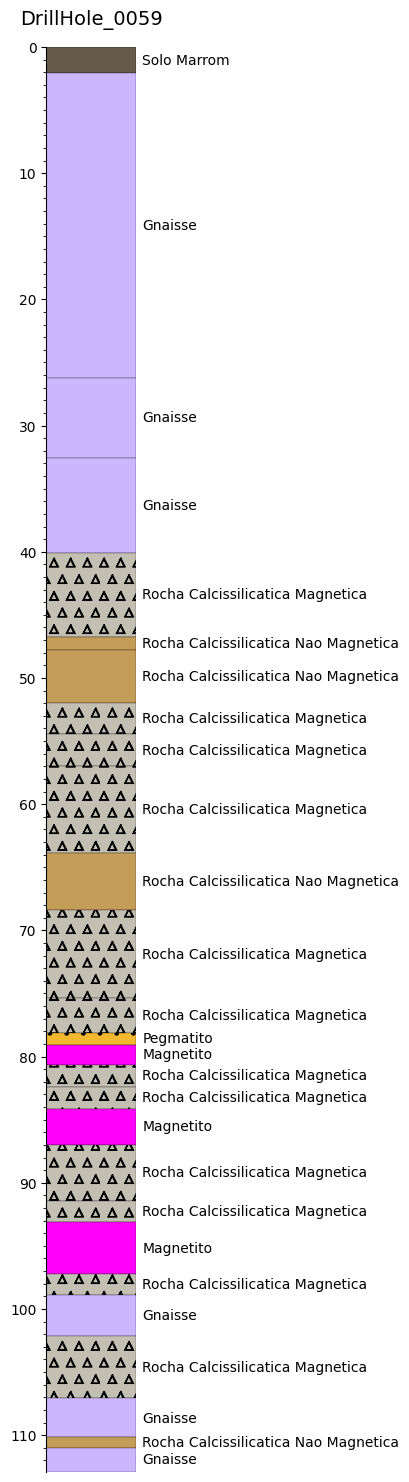

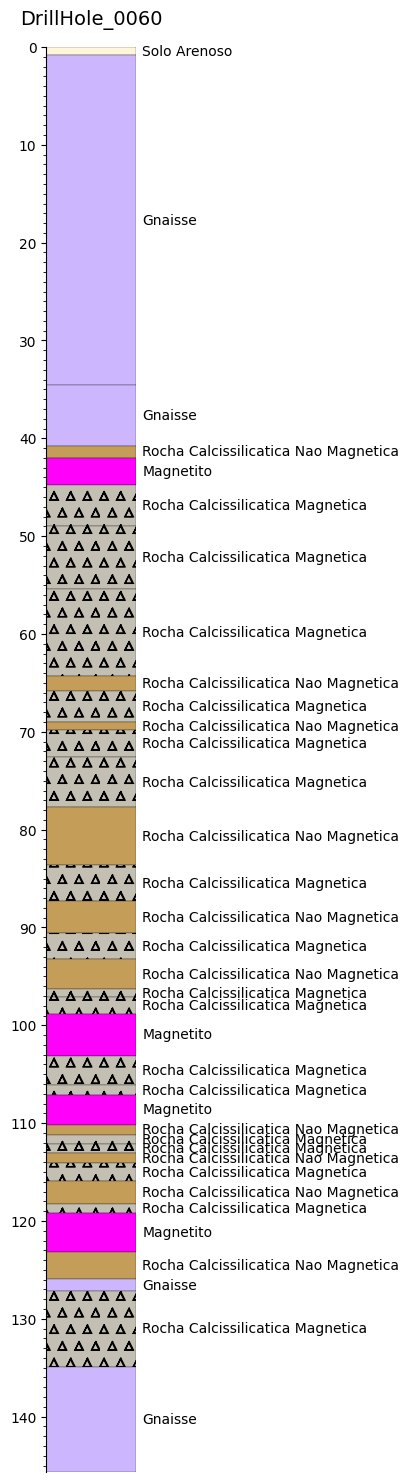

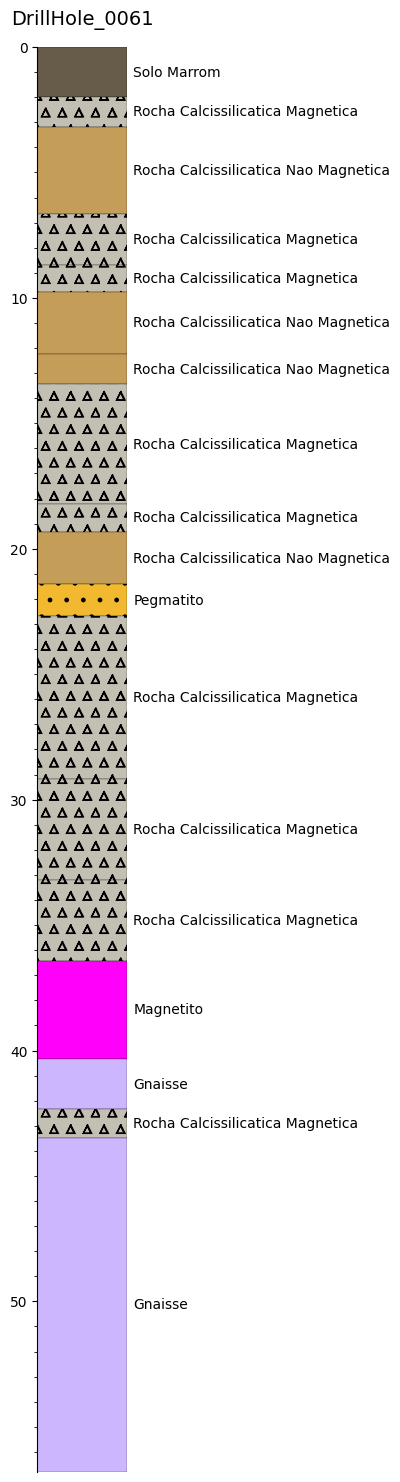

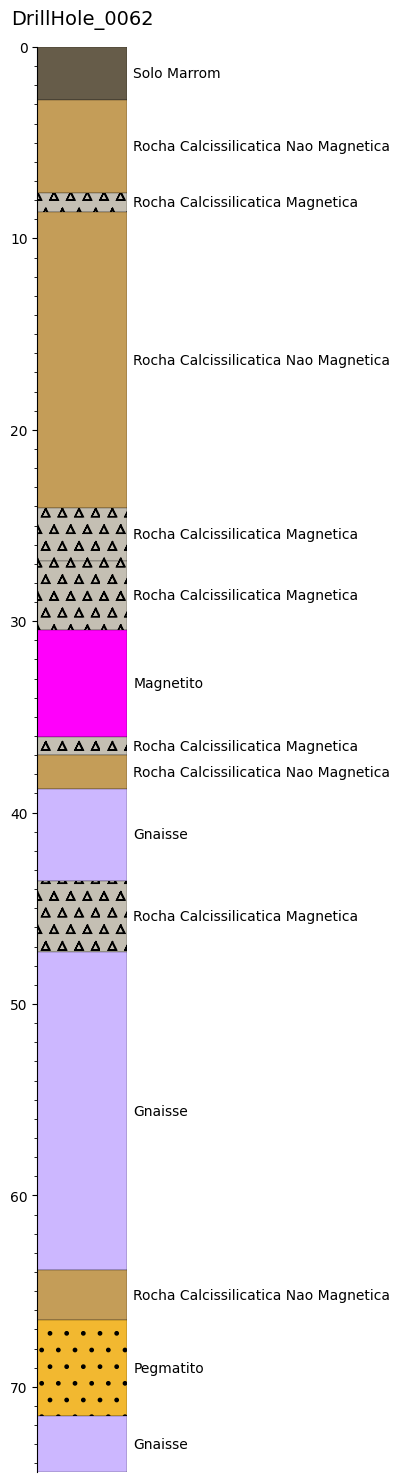

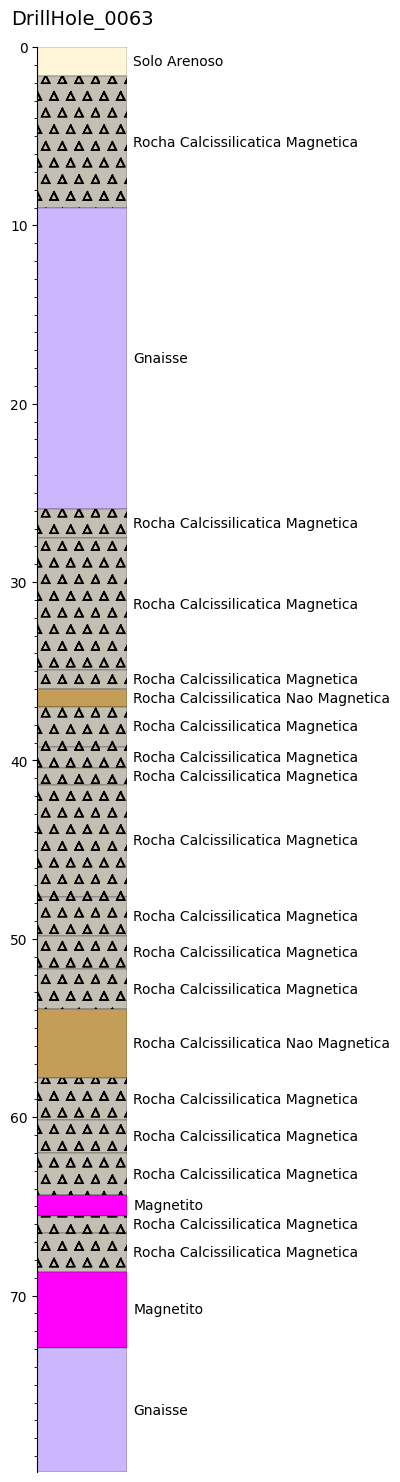

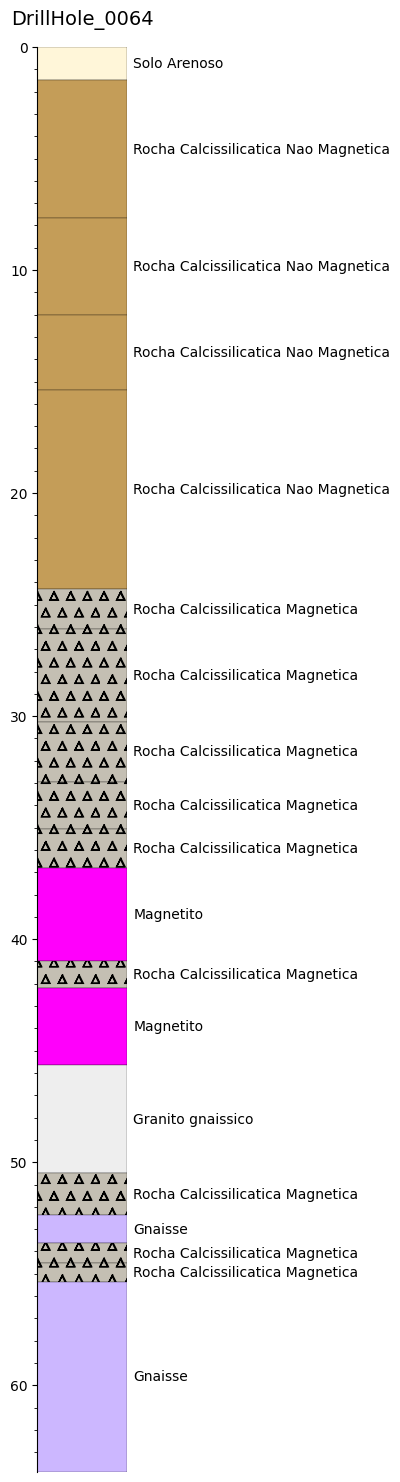

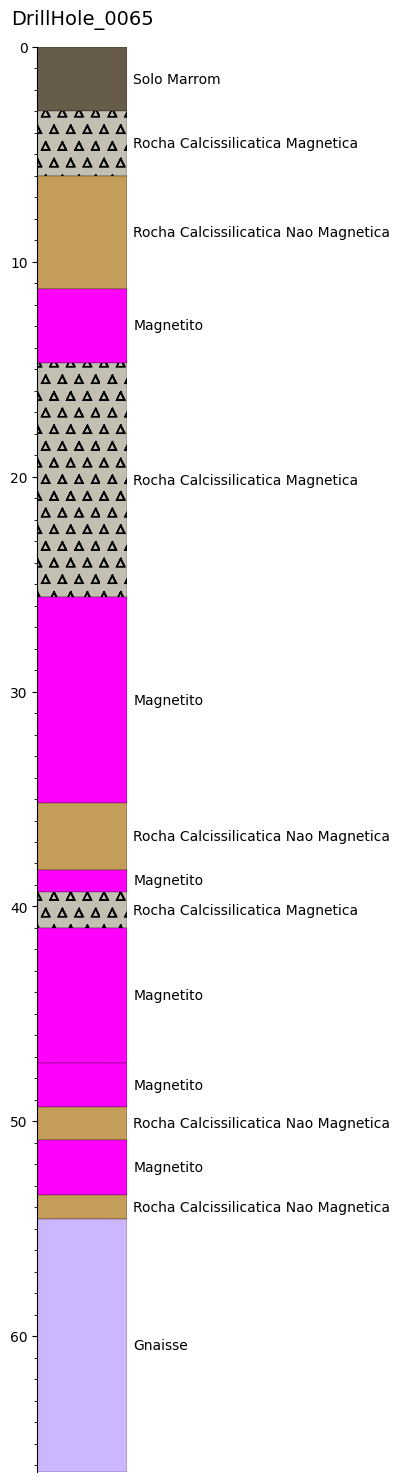

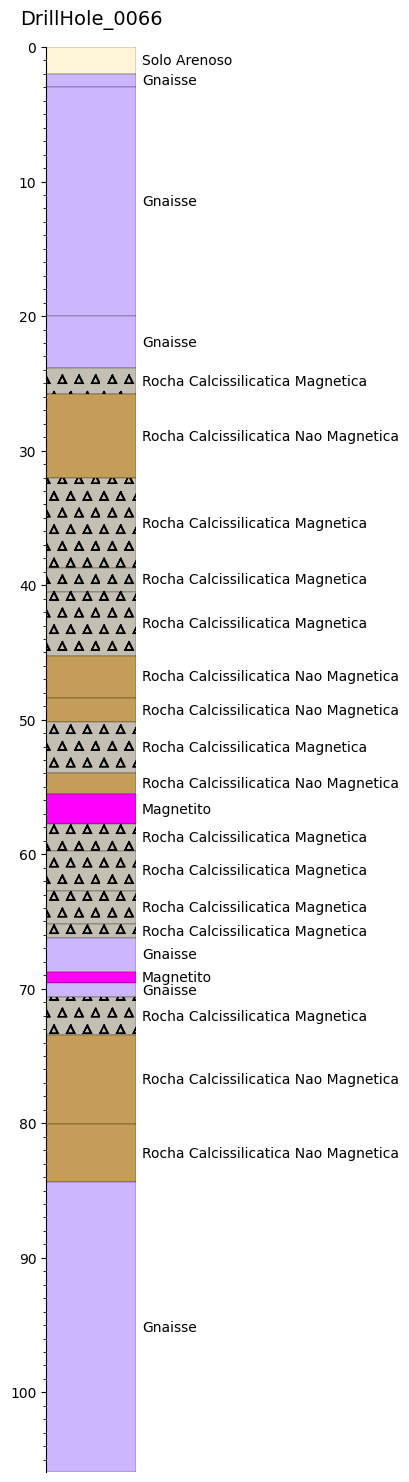

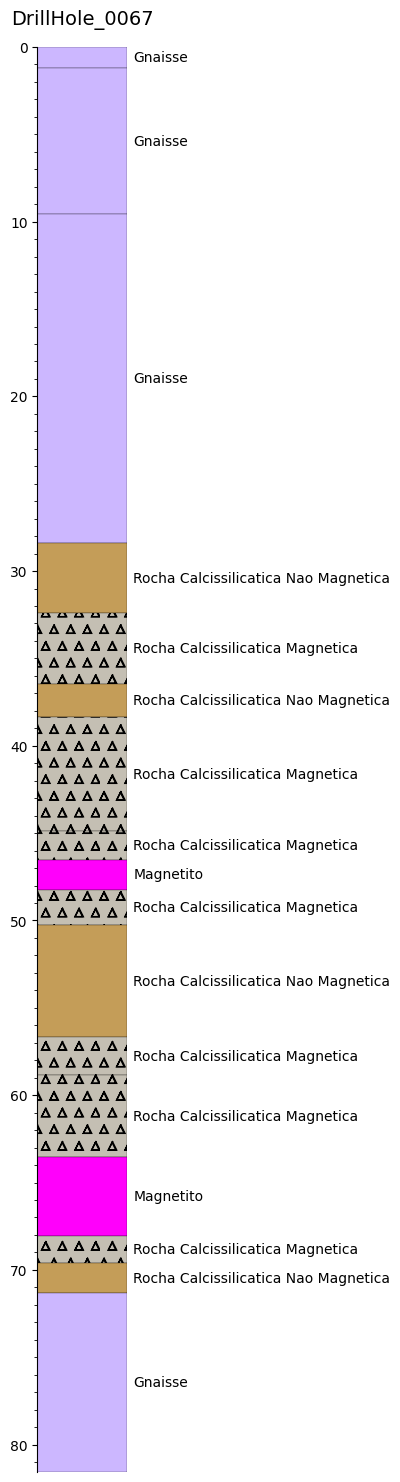

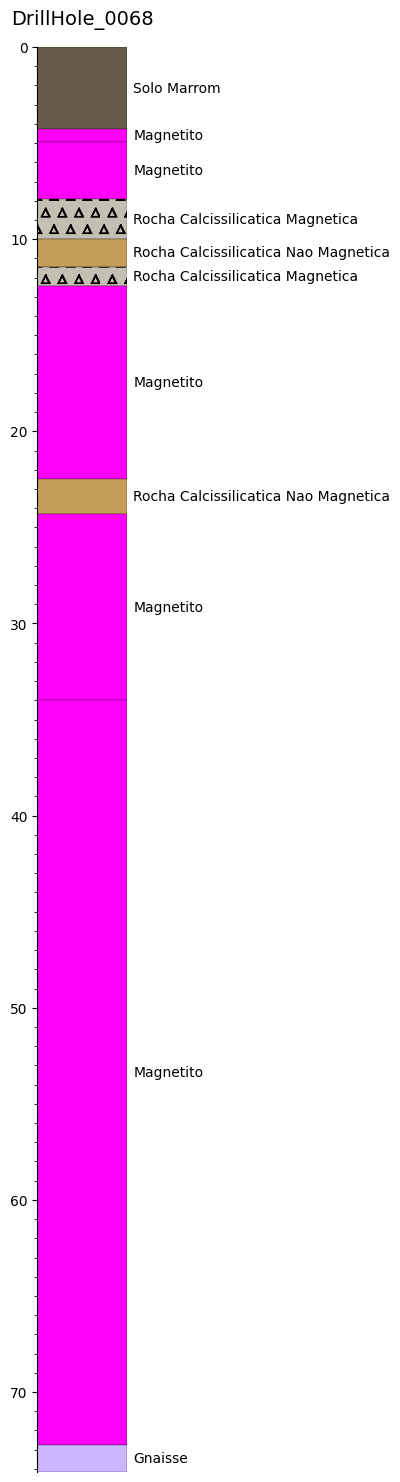

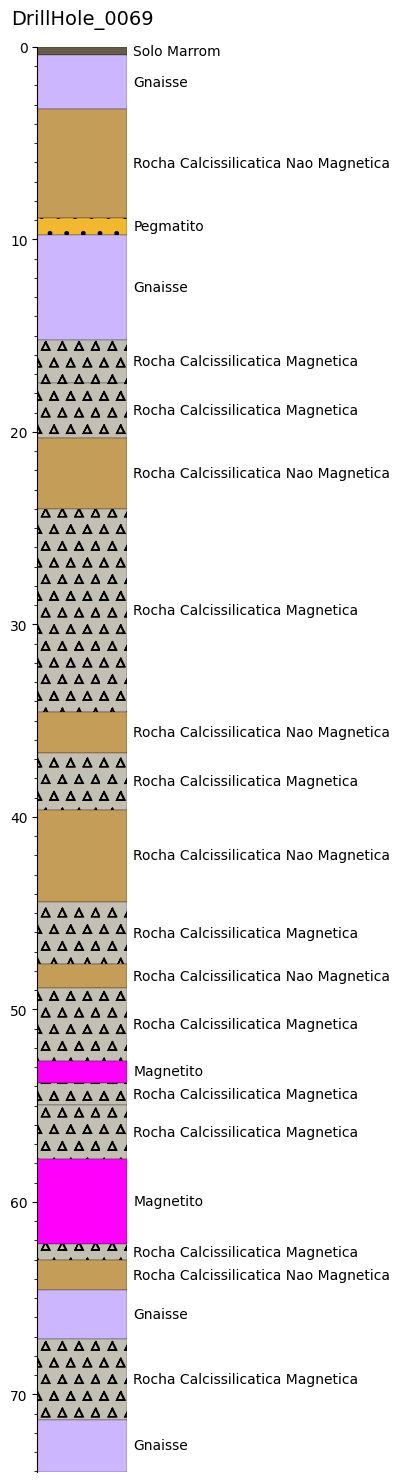

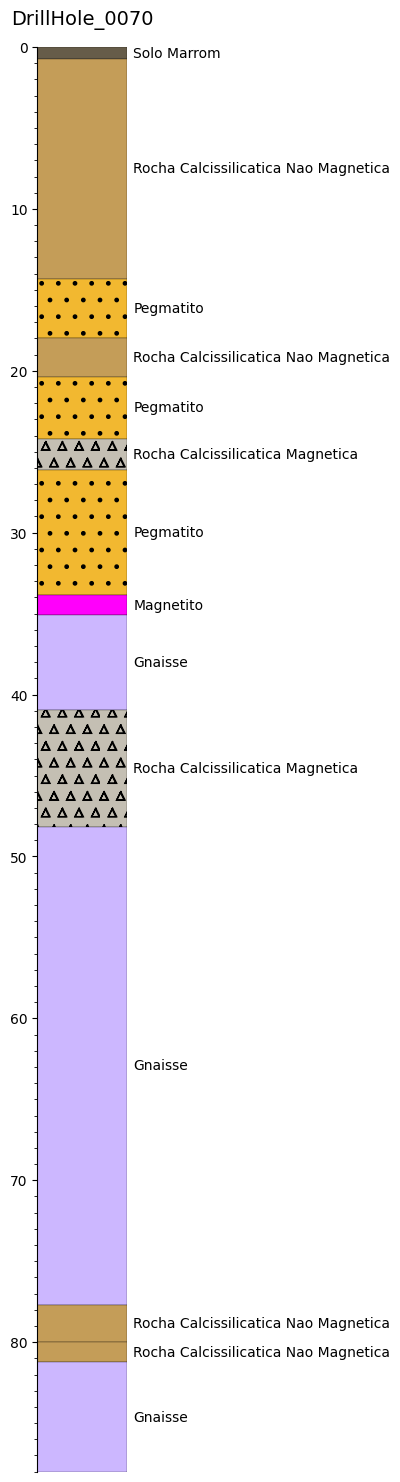

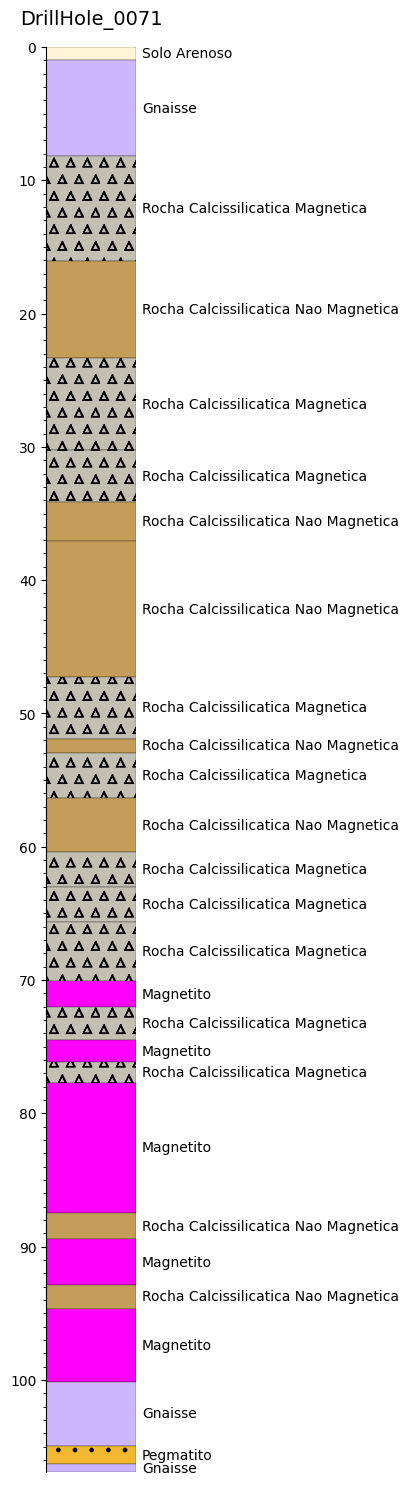

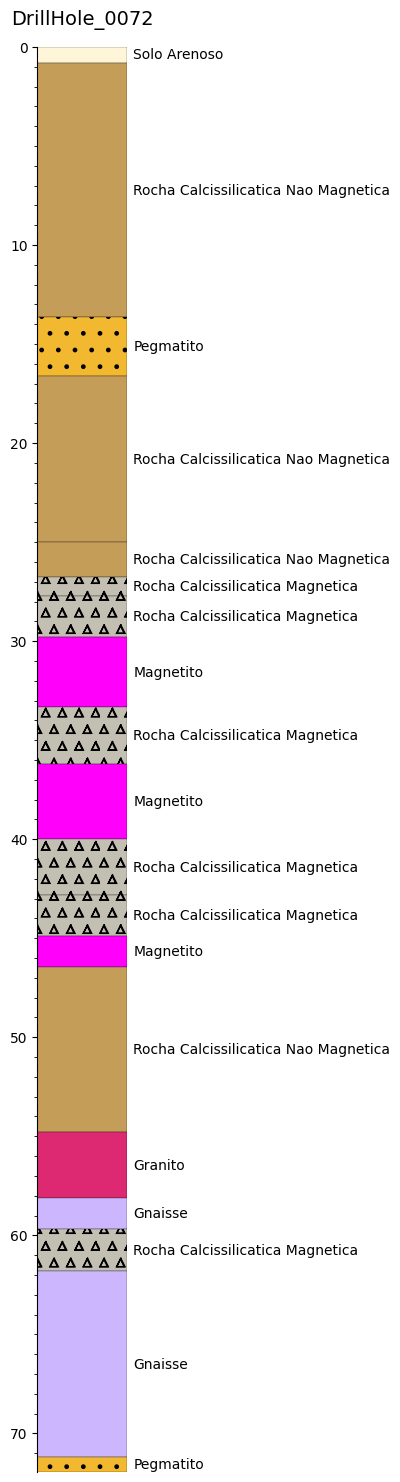

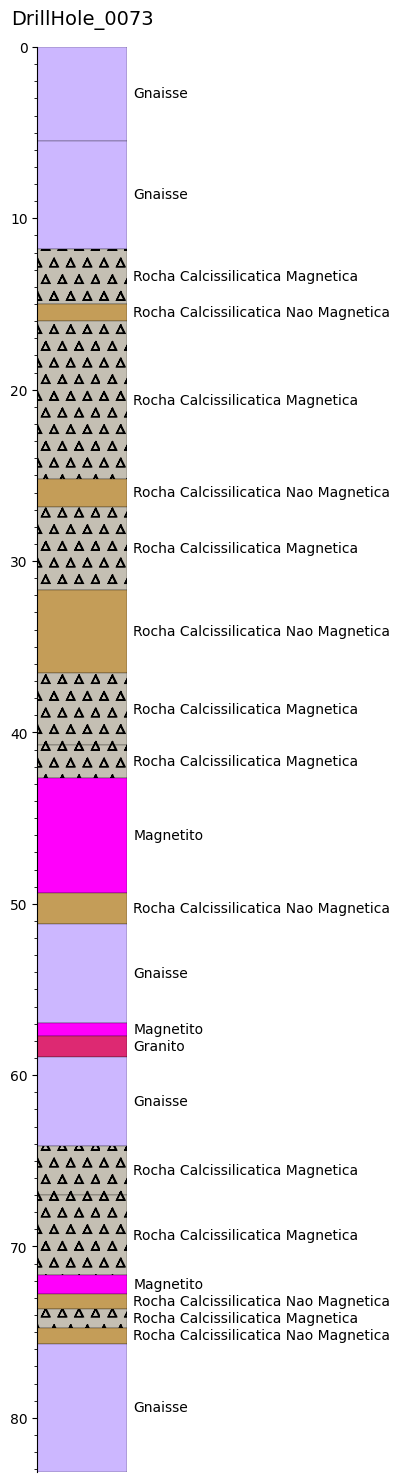

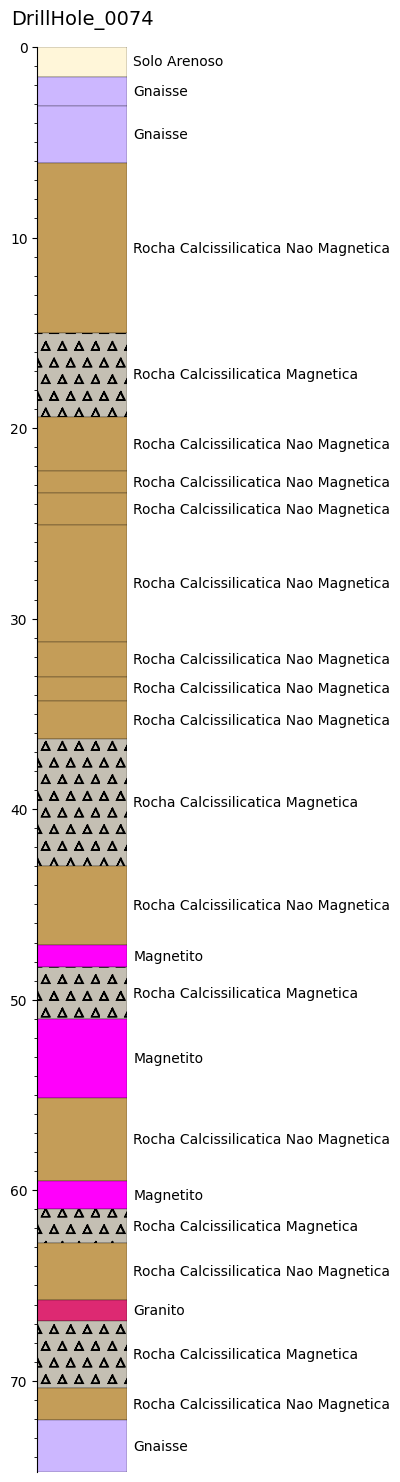

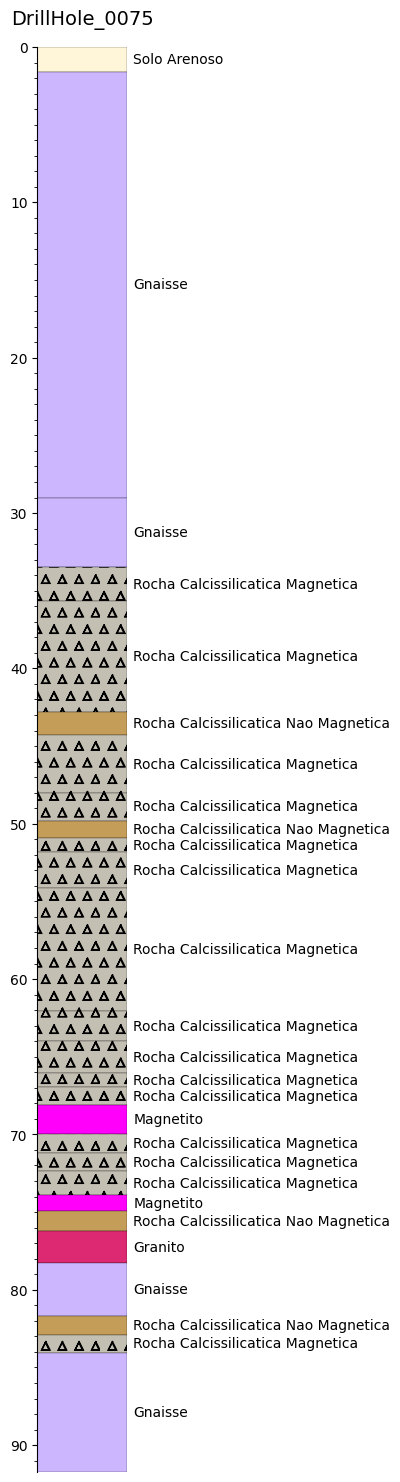

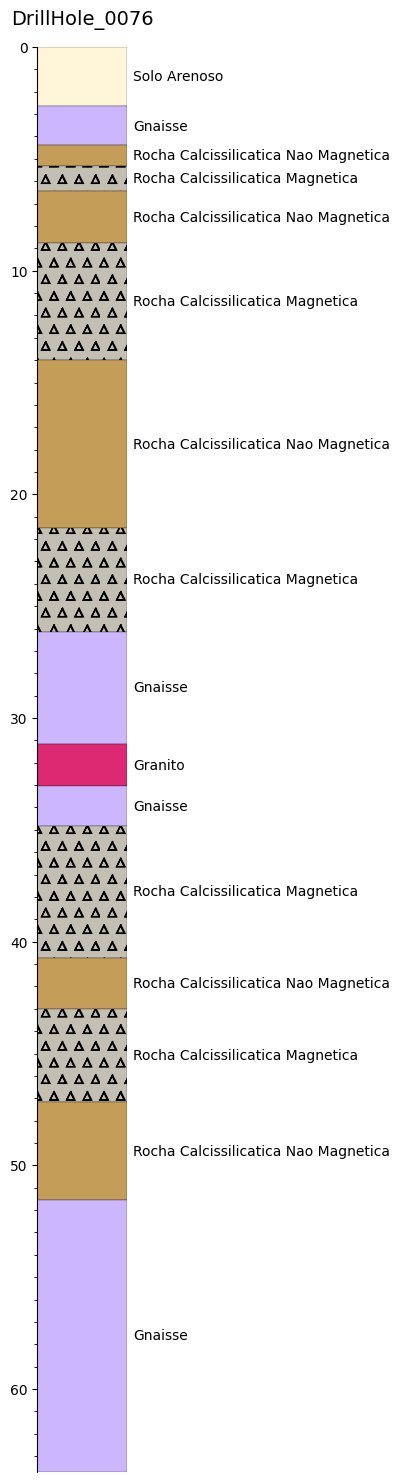

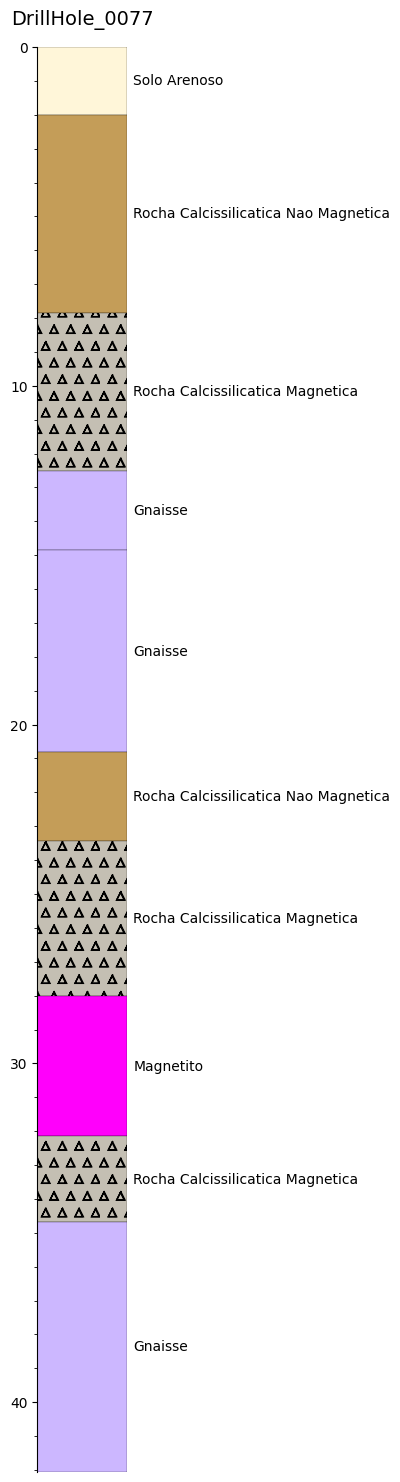

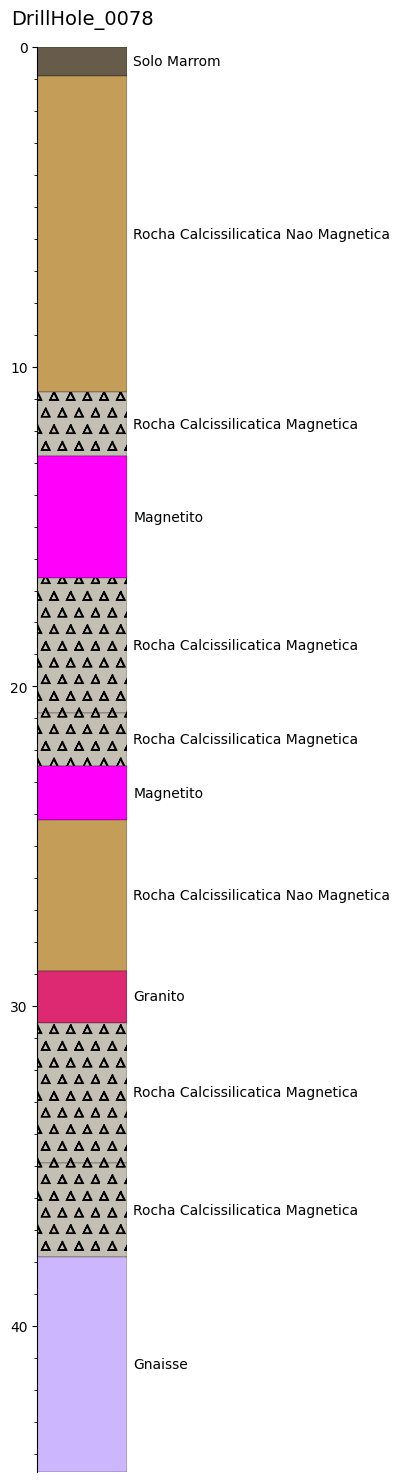

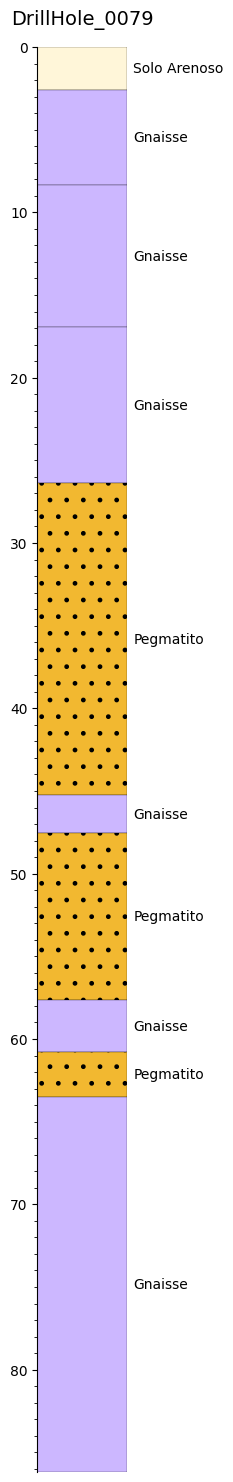

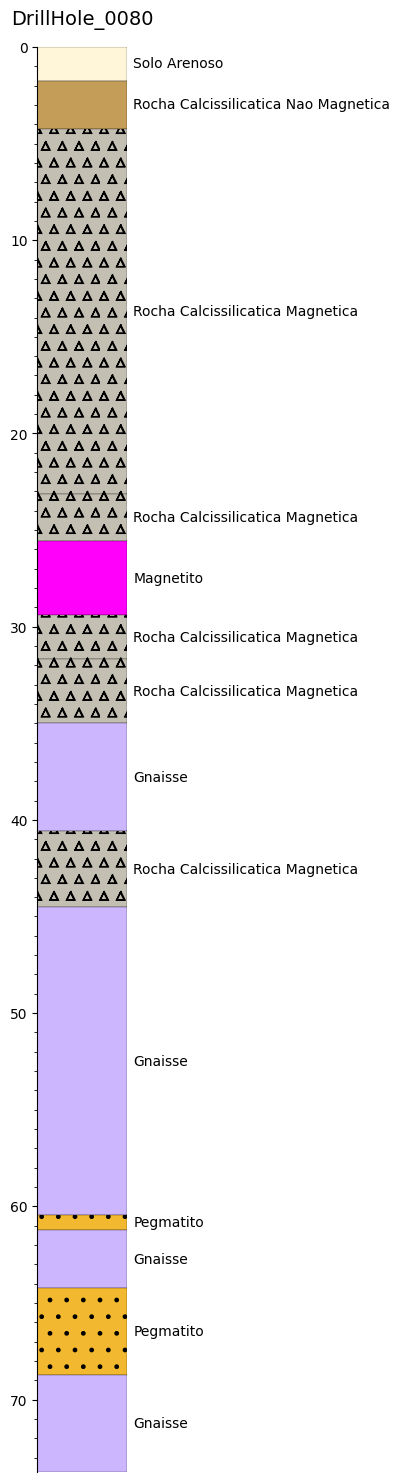

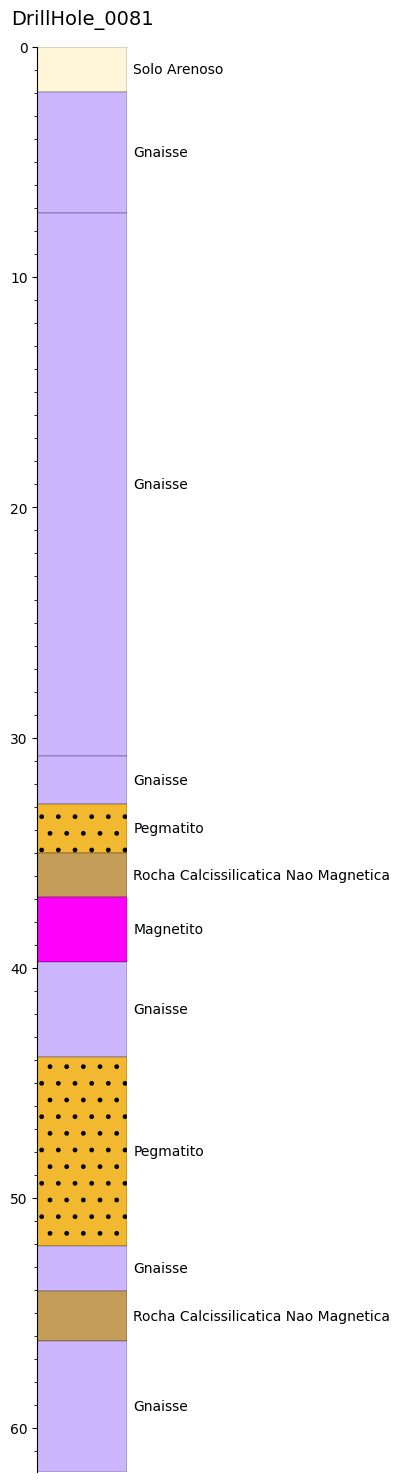

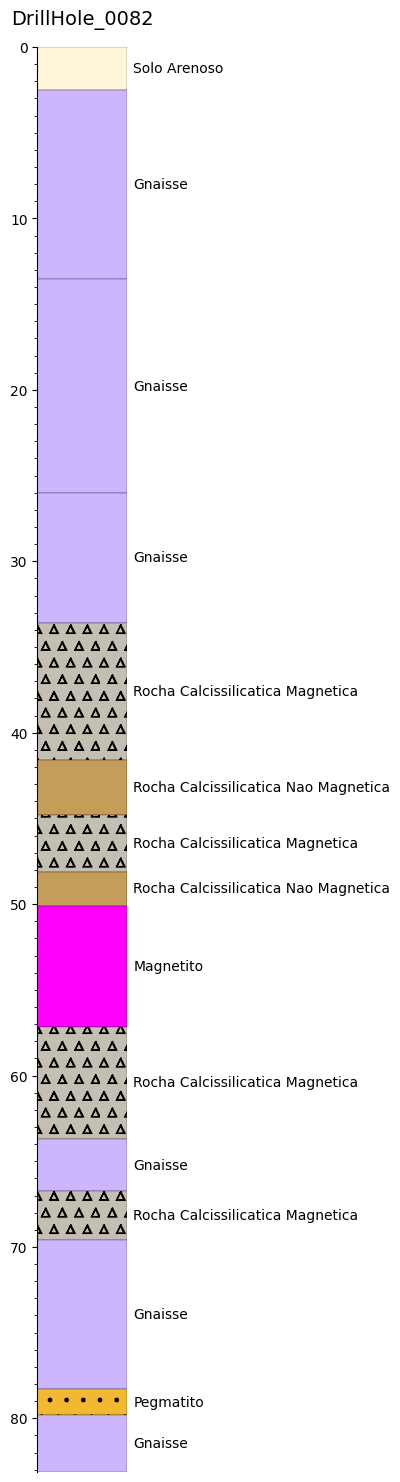

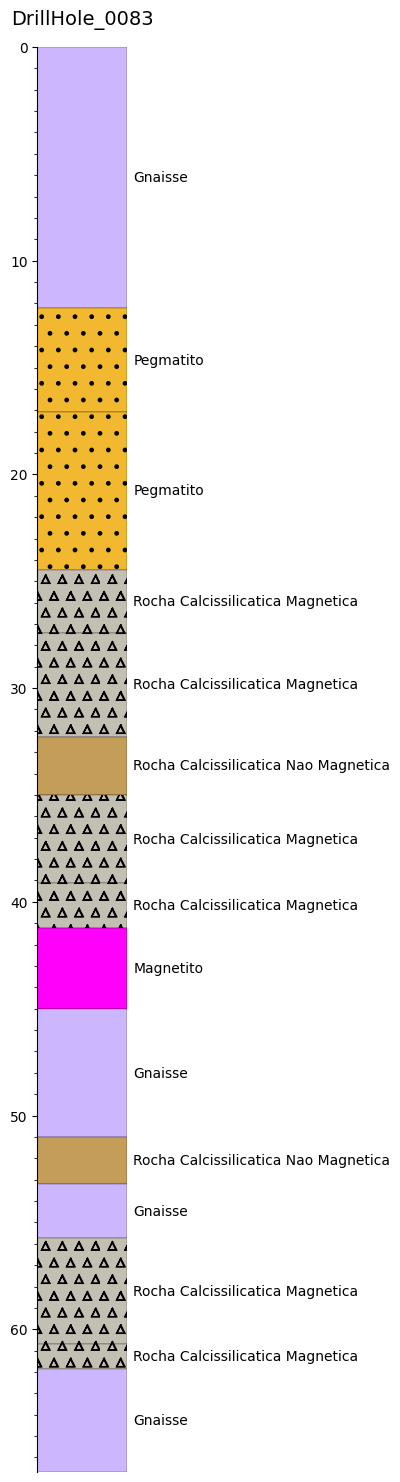

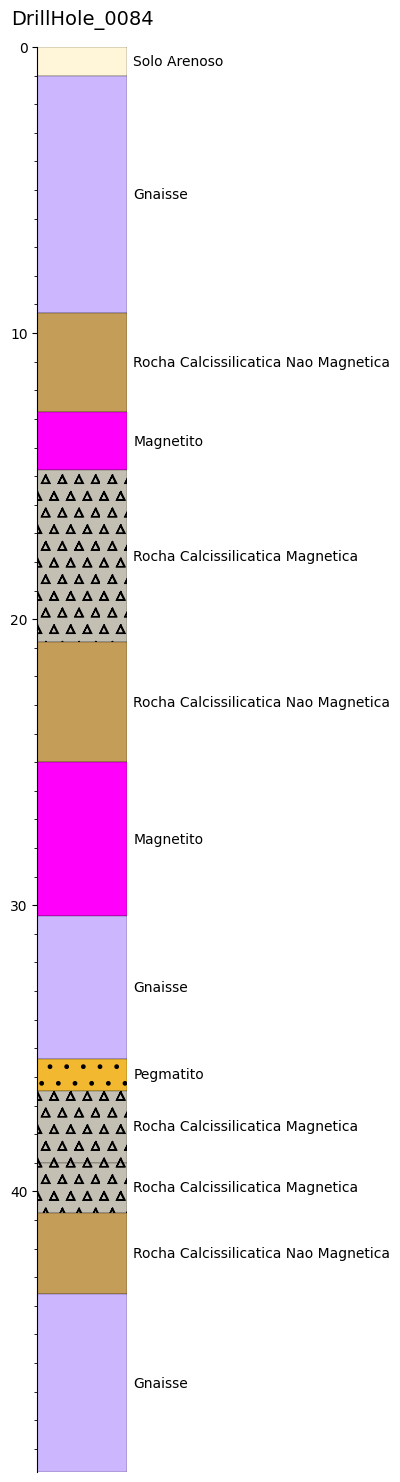

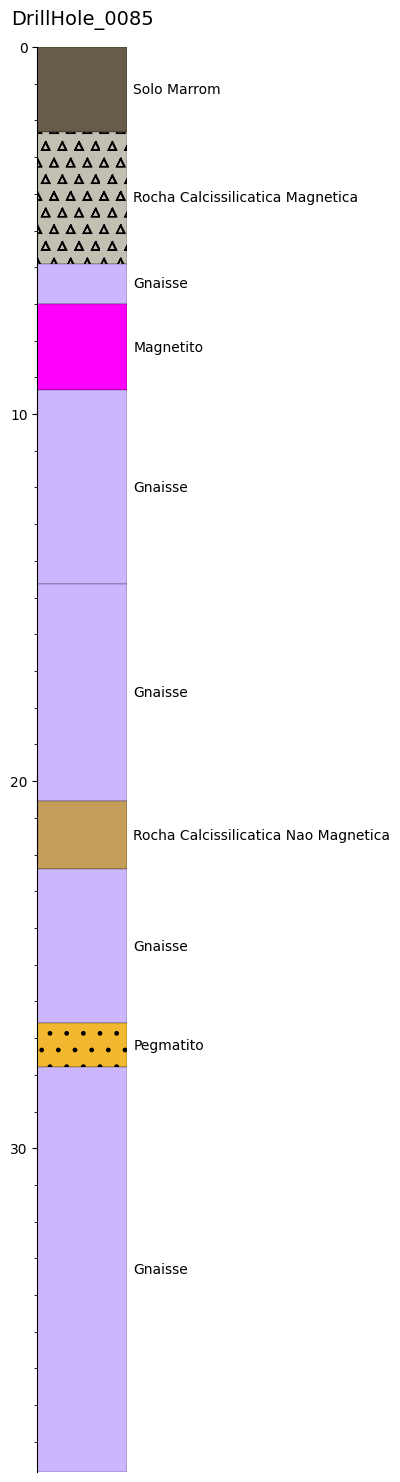

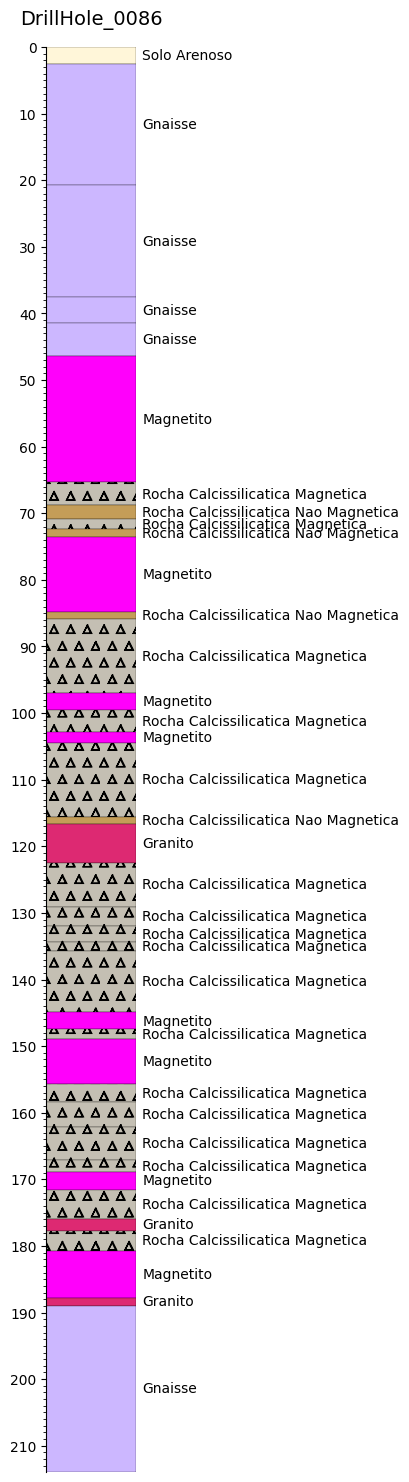

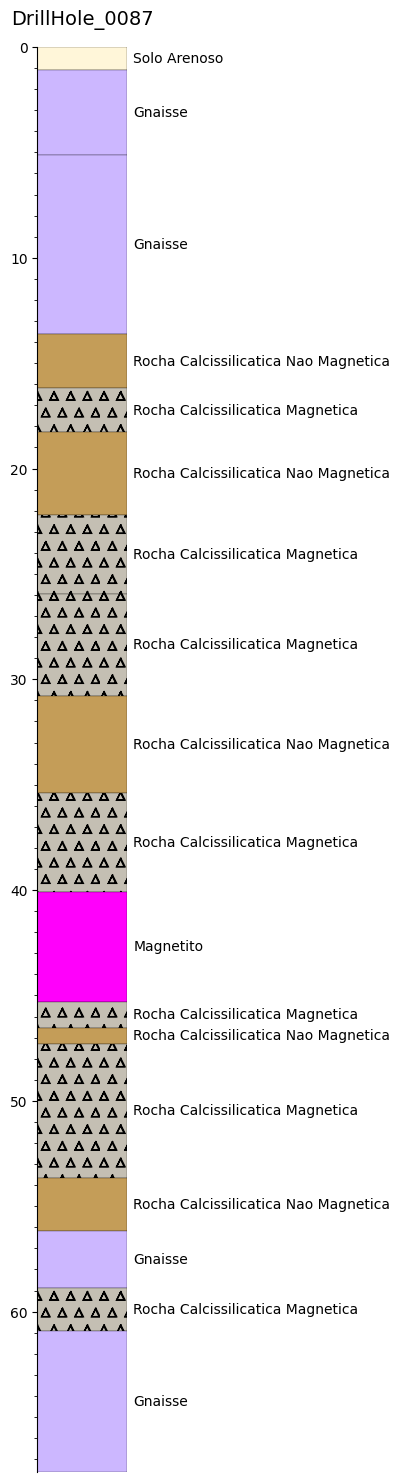

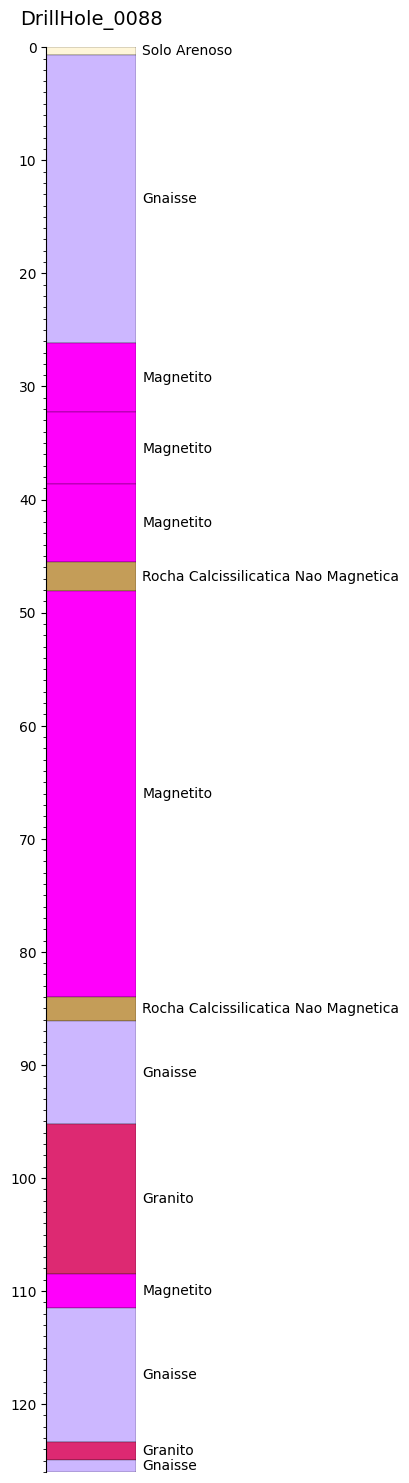

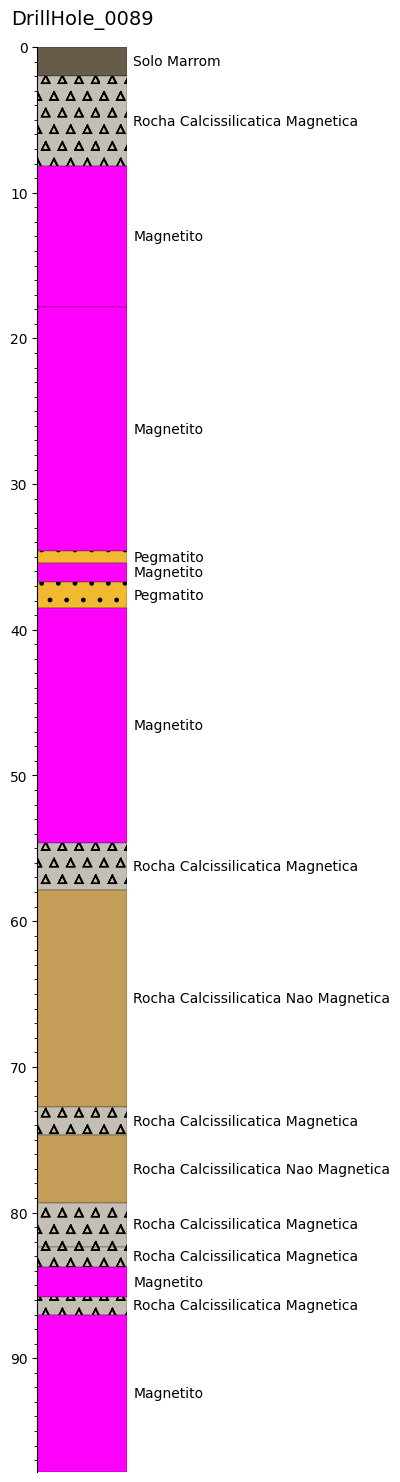

In [34]:
#For later: create a loop with an if-else condition where each lithology is assigned an acronym, and then run the code below to generate profiles for all drill holes.
    
holes = list(geology_copy.hole_id.unique())

for hole in holes:
    drill_hole = geology_copy[geology_copy['hole_id'] == hole]
    csv_text = drill_hole.to_csv()
    striplog = Striplog.from_csv(text=csv_text, lexicon=my_lexicon)

    for iv in striplog:
        iv.components = [Component({'lithology': iv.data['lithology']})]
        iv.data = {'hole_id': iv.data['hole_id']}
    
    striplog.plot(legend=my_legend,
                  aspect=10,
                  lw=0.2,
                  label='lithology'
                 )

    plt.title(hole,
              loc='center',
              fontdict={'fontsize':14},
              y=1.01
             );
    
#a display of 20 hole_id

# d) Structural Analysis

In [35]:
import mplstereonet as mpl

In [36]:
collar_copy.head()

hole_id          Zone Utm          x           y  Elevation  \
0  DrillHole_0001  SIRGAS2000 - 24S  182038.41  9325551.30     243.89   
1  DrillHole_0002  SIRGAS2000 - 24S  182000.37  9325583.08     242.32   
2  DrillHole_0003  SIRGAS2000 - 24S  182001.47  9325517.67     239.31   
3  DrillHole_0004  SIRGAS2000 - 24S  181968.83  9325577.40     239.70   
4  DrillHole_0005  SIRGAS2000 - 24S  182058.91  9325589.29     248.35   

   Depth m  Dip  Azimute  
0    87.91  -60      132  
1   107.40  -60      132  
2    87.11  -60      132  
3    75.91  -60      132  
4    98.54  -60      132

In [37]:
structural = collar_copy.groupby('hole_id')[['Dip','Azimute']].mean().reset_index()
structural.head()

hole_id   Dip  Azimute
0  DrillHole_0001 -60.0    132.0
1  DrillHole_0002 -60.0    132.0
2  DrillHole_0003 -60.0    132.0
3  DrillHole_0004 -60.0    132.0
4  DrillHole_0005 -60.0    132.0

In [38]:
for i in structural.iterrows():
  print(i[1][1], i[1][2])

-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-90.0 0.0
-60.0 132.0
-60.0 132.0
-90.0 0.0
-90.0 0.0
-90.0 0.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-90.0 0.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-90.0 0.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-90.0 0.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 132.0
-60.0 90.0
-60.0 132

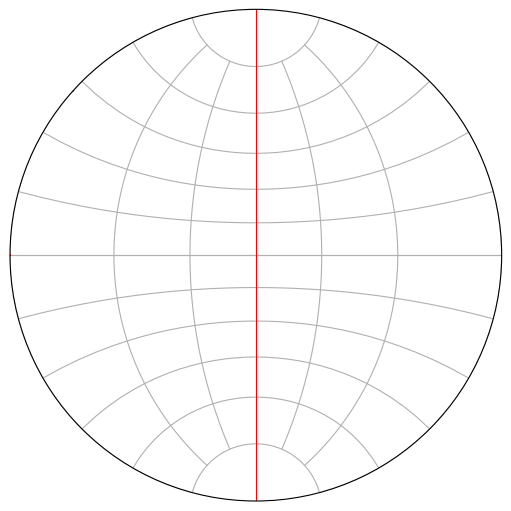

In [39]:
# Plotting well attitudes

strike = structural["Azimute"]
dip = structural["Dip"]

fig = plt.figure(figsize=(5, 5), constrained_layout=True)

ax = fig.add_subplot(111, projection="equal_angle_stereonet")

ax.plane(strike, dip, c="red", linewidth=0.5)

ax.grid()

plt.show()

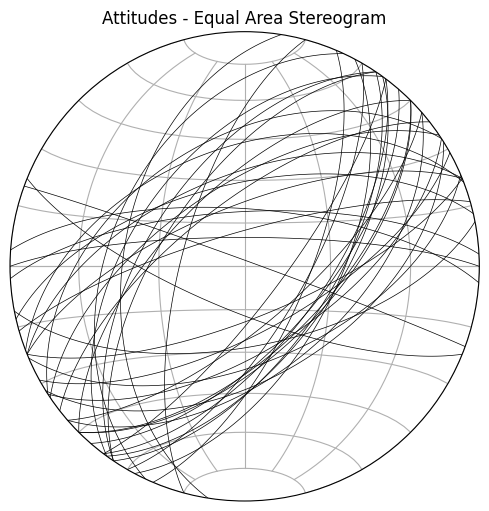

In [40]:
# Example from Kevin
data = pd.read_csv("data_estructural.csv")

strike = data["direccion"]
dip = data["buzamiento"]

fig = plt.figure(figsize=(5, 5), constrained_layout=True)

ax = fig.add_subplot(111, projection="stereonet")

ax.plane(strike, dip, c="black", linewidth=0.5)

ax.grid()


plt.title('Attitudes - Equal Area Stereogram');
plt.show()



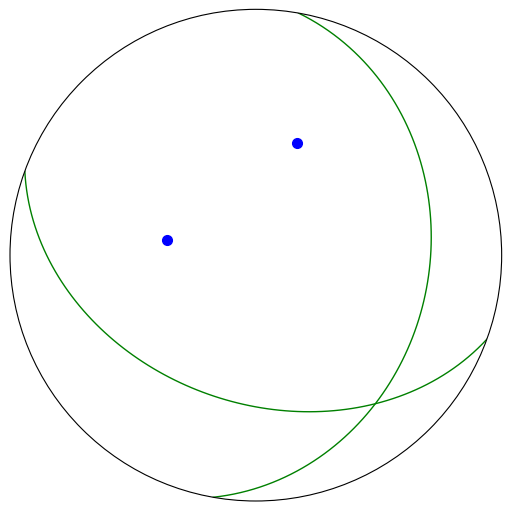

In [41]:

#Cutting Plane

dip_directions = [100, 200]
dips = [30, 40]

# Subtracting 90 from the dip direction
strikes = np.array(dip_directions) - 90

fig, ax = mpl.subplots(figsize=(5, 5), constrained_layout=True)

ax.pole(strikes, dips, color="blue", ms=7)
ax.plane(strikes, dips, color="green", lw=1)

plt.show()

In [42]:
fit_strike, fit_dip = mpl.fit_girdle(strikes, dips)

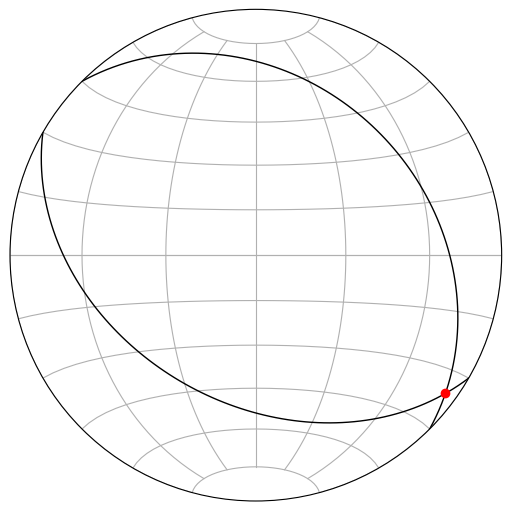

In [43]:
## Intersection of Planes

strike1, dip1 = 315, 30
strike2, dip2 = 120, 40

plunge, bearing = mpl.plane_intersection(strike1, dip1, strike2, dip2)

fig, ax = mpl.subplots(figsize=(5, 5), constrained_layout=True)

ax.plane(strike1, dip1, c="black", linewidth=1)
ax.plane(strike2, dip2, c="black", linewidth=1)

ax.line(plunge, bearing, marker=".", color="red", ms=12)

ax.grid() 

plt.show()

# e)Plotting Geochemical Data

In [44]:
assay_copy = assay.copy()
assay_copy.head()

sample_id         hole_id  depth_from  depth_to  \
0  AMOSTRA_1001             NaN         NaN       NaN   
1  AMOSTRA_1002             NaN         NaN       NaN   
2  AMOSTRA_1003  DrillHole_0005        0.00      1.50   
3  AMOSTRA_1004  DrillHole_0005        1.50      2.75   
4  AMOSTRA_1005  DrillHole_0005        2.75      4.00   

                               litho_reclass  SiO2_pct  TiO2_pct  Al2O3_pct  \
0                                        NaN      97.4      0.03       0.09   
1                                        NaN      54.2      0.02       0.49   
2                                        NaN      56.8      0.20       6.66   
3  Rocha Calcissilicatica Nao Magnetitoetica      47.5      0.88      13.25   
4  Rocha Calcissilicatica Nao Magnetitoetica      63.1      0.36       4.99   

   Cr2O3_pct  Fe_pct  ...  Pb_pct  S_pct  Sn_pct  Sr_pct  V_pct  Zn_pct  \
0      0.004    0.62  ...     NaN  0.003  0.0001   0.001  0.001     NaN   
1        NaN   30.18  ...   0.003    NaN  0.0001     NaN  0.002   0.003   
2      0.009   20.28  ...     NaN  0.005  0.0001   0.003  0.003   0.012   
3      0.037    9.15  ...   0.004  0.010  0.0001   0.019  0.010   0.023   
4      0.020   11.32  ...   0.008  0.012  0.0010   0.010  0.006   0.021   

   Zr_pct  total_pct  FeO_pct  mag_pct  
0     NaN      98.53     0.72     1.34  
1   0.002     100.40     1.39      NaN  
2   0.007     100.10     2.36     6.15  
3   0.027     100.10     0.79     0.63  
4   0.011     100.60     2.33     1.16  

[5 rows x 33 columns]

In [45]:
assay_copy.columns

Index(['sample_id', 'hole_id', 'depth_from', 'depth_to', 'litho_reclass',
       'SiO2_pct', 'TiO2_pct', 'Al2O3_pct', 'Cr2O3_pct', 'Fe_pct', 'Mn_pct',
       'CaO_pct', 'MgO_pct', 'Na2O_pct', 'K2O_pct', 'BaO_pct', 'P_pct',
       'loi_pct', 'As_pct', 'Cl_pct', 'Co_pct', 'Cu_pct', 'Ni_pct', 'Pb_pct',
       'S_pct', 'Sn_pct', 'Sr_pct', 'V_pct', 'Zn_pct', 'Zr_pct', 'total_pct',
       'FeO_pct', 'mag_pct'],
      dtype='object')

In [46]:
import pyrolite.plot

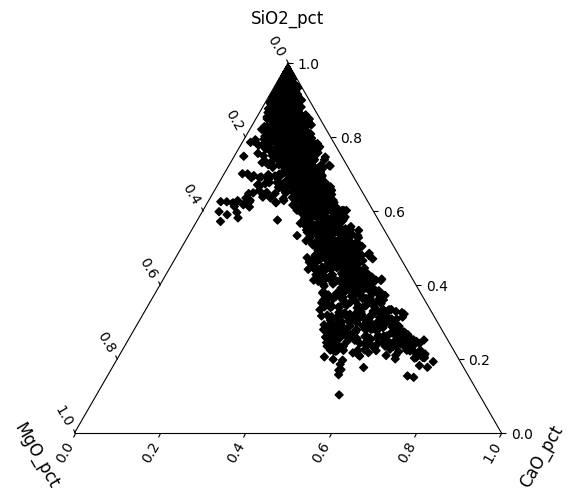

In [47]:
ax = assay_copy.loc[:, ["SiO2_pct", "MgO_pct", "CaO_pct"]].pyroplot.scatter(c="k")
plt.show()

#we can see that the drillings have a higher concentration on the Siliceous side of CaO
#justifying the large amount of calc-silicate rocks

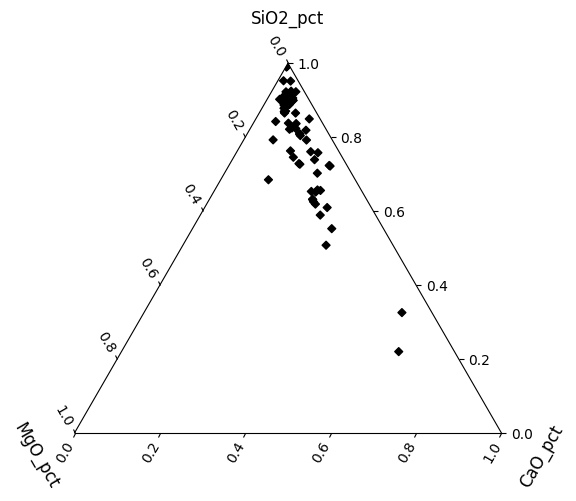

In [48]:
am = assay_copy[assay_copy['hole_id'] == 'DrillHole_0001']
ax = am.loc[:, ["SiO2_pct", "MgO_pct", "CaO_pct"]].pyroplot.scatter(c="k")
plt.show()


In [49]:
### Como fazer um looping para gerar gráficos para cada Sondagem?

# f) 3D Visualization (extra)

## Let's do it together...

Column names:

For the collar, the columns must have the names: ID, X, Y, Z.

For the survey, the columns must have the names: ID, AT, AZ, DIP

For the table, the columns must have the names: ID, FROM, TO, and any other column with categorical or numerical values

**The Data for the Collar,Survey and Tables was gotten from [KevinalexandrGithhub](https://github.com/kevinalexandr19/manual-python-geologia/tree/main)**

In [50]:
collar = pd.read_csv('collar_new.csv')
survey = pd.read_csv('survey_new.csv')
table = pd.read_csv('assay_new.csv')

table_name = survey

data = DrillData(collar=collar,
                 survey=survey,
                 table=table,
                 table_name = survey)


Drillings must be validated before performing the 3D visualization.


In [51]:
data.validate()

Validation of information in collar:
    Column validation in collar:
        Column ID: included
        Column X: included
        Column Y: included
        Column Z: included
    Data type validation in collar:
        Columna ID: object
        Columna X: float64
        Columna Y: float64
        Columna Z: float64

Validation of information in survey:
    Column validation in survey:
        Column ID: included
        Column AT: included
        Column AZ: included
        Column DIP: included
    Data type validation in survey:
        Columna ID: object
        Columna AT: float64
        Columna AZ: float64
        Columna DIP: float64

Validation of information in         ID          AT     AZ   DIP
0    DH001    0.000000   90.5  50.0
1    DH001   31.000000   90.5  50.0
2    DH001  198.050003   90.5  50.0
3    DH002    0.000000  271.5  45.0
4    DH002   31.000000  271.5  45.0
..     ...         ...    ...   ...
418  DH056  336.350006  281.5  71.0
419  DH057    0.000000  270

In [59]:
fig.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_9100\89474557.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
